# Setup

In [2]:
!pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 21.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import csv

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

from tensorflow.keras import layers, models, datasets

#SVM

##Set up dataset

In [4]:
scaler = StandardScaler()

In [ ]:
df = pd.read_csv('') # Replace the path to the dataset to the working one
df.dropna(inplace=True)
columns_drop = ['label', 'image', 'style', 'category']

X = df.drop(columns_drop, axis=1)
X_norm = scaler.fit_transform(X)
y = df['label']
y_category = df['category']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, stratify=y_category, random_state=42)

##Distinguish AI and Human

In [ ]:
param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.1, 1, 10, 'scale', 'auto'],
              'kernel': ['linear', 'rbf']
}
svm = SVC()

grid_search = GridSearchCV(svm, param_grid, verbose=3, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

best_svm = grid_search.best_estimator_
test_accuracy = best_svm.score(X_test, y_test)

print("Test set accuracy with best parameters:", test_accuracy)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.905 total time=   0.6s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.908 total time=   0.6s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.911 total time=   0.6s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.922 total time=   0.3s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.916 total time=   0.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.896 total time=   0.6s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.905 total time=   0.6s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.880 total time=   0.6s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.902 total time=   0.6s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.910 total time=   0.6s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.905 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear

In [ ]:
model = SVC(kernel='rbf', C=10, gamma='auto')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9741666666666666


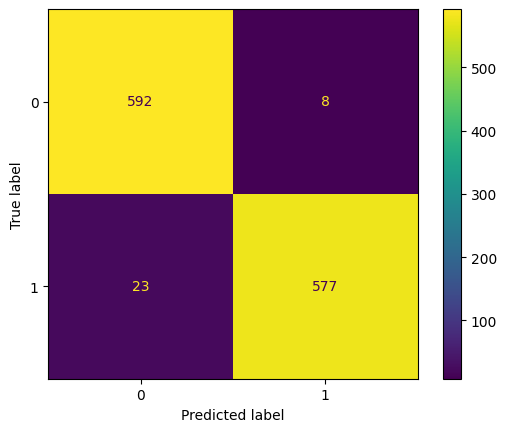

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

##Distinguish different category

In [ ]:
param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.1, 1, 10, 'scale', 'auto'],
              'kernel': ['linear', 'rbf']
}
svm = SVC()

grid_search = GridSearchCV(svm, param_grid, verbose=3, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

best_svm = grid_search.best_estimator_
test_accuracy = best_svm.score(X_test, y_test)

print("Test set accuracy with best parameters:", test_accuracy)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.774 total time=   0.4s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.774 total time=   0.7s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.767 total time=   0.7s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.792 total time=   0.7s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.773 total time=   0.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.714 total time=   1.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.9s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.695 total time=   1.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.738 total time=   1.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.725 total time=   0.8s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.774 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear

In [ ]:
model = SVC(kernel='rbf', C=10, gamma='scale')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8041666666666667


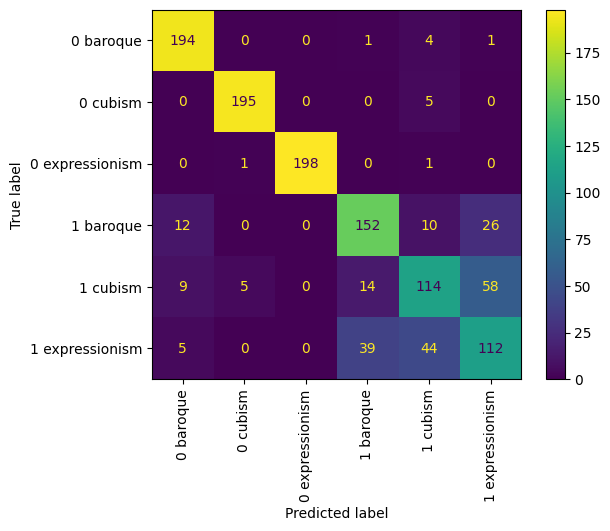

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.xticks(rotation=90)
plt.show()

#LR

##Set up dataset

In [ ]:
df = pd.read_csv('/content/CS180H_size6000.csv') # Replace the path to the dataset to the working one
df.dropna(inplace=True)
columns_drop = ['label', 'image', 'style']
X = df.drop(columns_drop, axis=1)
y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y_category, random_state=42)

##Distinguish AI and Human

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

In [ ]:
param_grid = {
    'logreg__solver': ['lbfgs', 'saga', 'liblinear'],
    'logreg__penalty': ['l2', 'elasticnet'],
    'logreg__C': [0.2, 0.3, 0.5, 0.7, 0.8, 1],
    'logreg__max_iter': [50, 80, 100, 120, 200, 500, 1000]
}

In [ ]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits
[CV 1/5] END logreg__C=0.2, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.900 total time=   0.1s
[CV 2/5] END logreg__C=0.2, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.903 total time=   0.1s
[CV 3/5] END logreg__C=0.2, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.908 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 4/5] END logreg__C=0.2, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.912 total time=   0.1s
[CV 5/5] END logreg__C=0.2, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.907 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.2, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.874 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.2, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.883 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.2, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.882 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.2, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.882 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.2, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.893 total time=   0.5s
[CV 1/5] END logreg__C=0.2, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.902 total time=   0.2s
[CV 2/5] END logreg__C=0.2, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.903 total time=   0.2s
[CV 3/5] END logreg__C=0.2, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.908 total time=   0.2s
[CV 4/5] END logreg__C=0.2, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.912 total time=   0.1s
[CV 5/5] END logreg__C=0.2, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.908 total time=   0.1s
[CV 1/5] END logreg__C=0.2, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.2, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan tota

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.2, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.886 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.2, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.889 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.2, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.885 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.2, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.893 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.2, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.893 total time=   0.8s
[CV 1/5] END logreg__C=0.2, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.902 total time=   0.1s
[CV 2/5] END logreg__C=0.2, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.903 total time=   0.1s
[CV 3/5] END logreg__C=0.2, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.908 total time=   0.1s
[CV 4/5] END logreg__C=0.2, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.912 total time=   0.1s
[CV 5/5] END logreg__C=0.2, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.908 total time=   0.1s
[CV 1/5] END logreg__C=0.2, logreg__max_iter=80, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.2, logreg__max_iter=80, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan tota

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.2, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.890 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.2, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.892 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.2, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.890 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.2, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.896 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.2, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.894 total time=   0.4s
[CV 1/5] END logreg__C=0.2, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.902 total time=   0.1s
[CV 2/5] END logreg__C=0.2, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.903 total time=   0.1s
[CV 3/5] END logreg__C=0.2, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.908 total time=   0.1s
[CV 4/5] END logreg__C=0.2, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.912 total time=   0.1s
[CV 5/5] END logreg__C=0.2, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.908 total time=   0.1s
[CV 1/5] END logreg__C=0.2, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.2, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.2, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.892 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.2, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.893 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.2, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.892 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.2, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.897 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.2, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.899 total time=   0.4s
[CV 1/5] END logreg__C=0.2, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.902 total time=   0.1s
[CV 2/5] END logreg__C=0.2, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.903 total time=   0.1s
[CV 3/5] END logreg__C=0.2, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.908 total time=   0.1s
[CV 4/5] END logreg__C=0.2, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.912 total time=   0.1s
[CV 5/5] END logreg__C=0.2, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.908 total time=   0.1s
[CV 1/5] END logreg__C=0.2, logreg__max_iter=120, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.2, logreg__max_iter=120, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.2, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.895 total time=   1.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.2, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.896 total time=   1.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.2, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.900 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.2, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.903 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.2, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.903 total time=   0.7s
[CV 1/5] END logreg__C=0.2, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.902 total time=   0.1s
[CV 2/5] END logreg__C=0.2, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.903 total time=   0.1s
[CV 3/5] END logreg__C=0.2, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.908 total time=   0.1s
[CV 4/5] END logreg__C=0.2, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.912 total time=   0.1s
[CV 5/5] END logreg__C=0.2, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.908 total time=   0.1s
[CV 1/5] END logreg__C=0.2, logreg__max_iter=200, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.2, logreg__max_iter=200, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.2, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.897 total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.2, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.903 total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.2, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.906 total time=   2.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.2, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.910 total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.2, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.903 total time=   3.5s
[CV 1/5] END logreg__C=0.2, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.902 total time=   0.1s
[CV 2/5] END logreg__C=0.2, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.903 total time=   0.1s
[CV 3/5] END logreg__C=0.2, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.908 total time=   0.1s
[CV 4/5] END logreg__C=0.2, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.912 total time=   0.1s
[CV 5/5] END logreg__C=0.2, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.908 total time=   0.1s
[CV 1/5] END logreg__C=0.2, logreg__max_iter=500, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.2, logreg__max_iter=500, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.2, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.900 total time=   3.1s
[CV 2/5] END logreg__C=0.2, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.903 total time=   2.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.2, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.908 total time=   3.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.2, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.912 total time=   4.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.2, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.907 total time=   3.1s
[CV 1/5] END logreg__C=0.2, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.902 total time=   0.1s
[CV 2/5] END logreg__C=0.2, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.903 total time=   0.1s
[CV 3/5] END logreg__C=0.2, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.908 total time=   0.1s
[CV 4/5] END logreg__C=0.2, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.912 total time=   0.1s
[CV 5/5] END logreg__C=0.2, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.908 total time=   0.1s
[CV 1/5] END logreg__C=0.2, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.2, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs;

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 3/5] END logreg__C=0.3, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.915 total time=   0.1s
[CV 4/5] END logreg__C=0.3, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.921 total time=   0.1s
[CV 5/5] END logreg__C=0.3, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.912 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.3, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.874 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.3, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.883 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.3, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.882 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.3, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.882 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.3, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.893 total time=   0.2s
[CV 1/5] END logreg__C=0.3, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.904 total time=   0.1s
[CV 2/5] END logreg__C=0.3, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.907 total time=   0.1s
[CV 3/5] END logreg__C=0.3, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.916 total time=   0.1s
[CV 4/5] END logreg__C=0.3, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.921 total time=   0.1s
[CV 5/5] END logreg__C=0.3, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.912 total time=   0.1s
[CV 1/5] END logreg__C=0.3, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.3, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan tota

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.3, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.889 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.3, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.889 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.3, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.886 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.3, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.893 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.3, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.894 total time=   0.3s
[CV 1/5] END logreg__C=0.3, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.904 total time=   0.1s
[CV 2/5] END logreg__C=0.3, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.907 total time=   0.1s
[CV 3/5] END logreg__C=0.3, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.916 total time=   0.1s
[CV 4/5] END logreg__C=0.3, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.921 total time=   0.1s
[CV 5/5] END logreg__C=0.3, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.912 total time=   0.1s
[CV 1/5] END logreg__C=0.3, logreg__max_iter=80, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.3, logreg__max_iter=80, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan tota

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.3, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.887 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.3, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.892 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.3, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.890 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.3, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.897 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.3, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.895 total time=   0.6s
[CV 1/5] END logreg__C=0.3, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.904 total time=   0.1s
[CV 2/5] END logreg__C=0.3, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.907 total time=   0.1s
[CV 3/5] END logreg__C=0.3, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.916 total time=   0.1s
[CV 4/5] END logreg__C=0.3, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.921 total time=   0.1s
[CV 5/5] END logreg__C=0.3, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.912 total time=   0.1s
[CV 1/5] END logreg__C=0.3, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.3, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.3, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.893 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.3, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.895 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.3, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.893 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.3, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.900 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.3, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.900 total time=   0.4s
[CV 1/5] END logreg__C=0.3, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.904 total time=   0.1s
[CV 2/5] END logreg__C=0.3, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.907 total time=   0.1s
[CV 3/5] END logreg__C=0.3, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.916 total time=   0.1s
[CV 4/5] END logreg__C=0.3, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.921 total time=   0.1s
[CV 5/5] END logreg__C=0.3, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.912 total time=   0.1s
[CV 1/5] END logreg__C=0.3, logreg__max_iter=120, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.3, logreg__max_iter=120, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.3, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.893 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.3, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.899 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.3, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.902 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.3, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.905 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.3, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.903 total time=   0.7s
[CV 1/5] END logreg__C=0.3, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.904 total time=   0.1s
[CV 2/5] END logreg__C=0.3, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.907 total time=   0.1s
[CV 3/5] END logreg__C=0.3, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.916 total time=   0.1s
[CV 4/5] END logreg__C=0.3, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.921 total time=   0.1s
[CV 5/5] END logreg__C=0.3, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.912 total time=   0.1s
[CV 1/5] END logreg__C=0.3, logreg__max_iter=200, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.3, logreg__max_iter=200, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.3, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.901 total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.3, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.908 total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.3, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.908 total time=   1.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.3, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.912 total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.3, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.907 total time=   1.6s
[CV 1/5] END logreg__C=0.3, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.904 total time=   0.1s
[CV 2/5] END logreg__C=0.3, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.907 total time=   0.1s
[CV 3/5] END logreg__C=0.3, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.916 total time=   0.1s
[CV 4/5] END logreg__C=0.3, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.921 total time=   0.1s
[CV 5/5] END logreg__C=0.3, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.912 total time=   0.1s
[CV 1/5] END logreg__C=0.3, logreg__max_iter=500, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.3, logreg__max_iter=500, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.3, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.903 total time=   3.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.3, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.908 total time=   4.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.3, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.912 total time=   3.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.3, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.920 total time=   3.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.3, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.910 total time=   4.8s
[CV 1/5] END logreg__C=0.3, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.904 total time=   0.1s
[CV 2/5] END logreg__C=0.3, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.907 total time=   0.2s
[CV 3/5] END logreg__C=0.3, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.916 total time=   0.1s
[CV 4/5] END logreg__C=0.3, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.921 total time=   0.1s
[CV 5/5] END logreg__C=0.3, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.912 total time=   0.1s
[CV 1/5] END logreg__C=0.3, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.3, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs;

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 1/5] END logreg__C=0.5, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.911 total time=   0.1s
[CV 2/5] END logreg__C=0.5, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.911 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 3/5] END logreg__C=0.5, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.919 total time=   0.1s
[CV 4/5] END logreg__C=0.5, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.931 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END logreg__C=0.5, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.918 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.5, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.875 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.5, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.883 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.5, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.883 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.5, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.883 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.5, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.893 total time=   0.2s
[CV 1/5] END logreg__C=0.5, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.911 total time=   0.1s
[CV 2/5] END logreg__C=0.5, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.912 total time=   0.1s
[CV 3/5] END logreg__C=0.5, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.919 total time=   0.1s
[CV 4/5] END logreg__C=0.5, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.930 total time=   0.1s
[CV 5/5] END logreg__C=0.5, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.920 total time=   0.1s
[CV 1/5] END logreg__C=0.5, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.5, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan tota

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.5, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.890 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.5, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.889 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.5, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.887 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.5, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.893 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.5, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.895 total time=   0.3s
[CV 1/5] END logreg__C=0.5, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.911 total time=   0.1s
[CV 2/5] END logreg__C=0.5, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.912 total time=   0.1s
[CV 3/5] END logreg__C=0.5, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.919 total time=   0.1s
[CV 4/5] END logreg__C=0.5, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.930 total time=   0.1s
[CV 5/5] END logreg__C=0.5, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.920 total time=   0.1s
[CV 1/5] END logreg__C=0.5, logreg__max_iter=80, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.5, logreg__max_iter=80, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan tota

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.5, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.889 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.5, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.894 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.5, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.892 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.5, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.896 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.5, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.898 total time=   0.4s
[CV 1/5] END logreg__C=0.5, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.911 total time=   0.1s
[CV 2/5] END logreg__C=0.5, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.912 total time=   0.1s
[CV 3/5] END logreg__C=0.5, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.919 total time=   0.1s
[CV 4/5] END logreg__C=0.5, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.930 total time=   0.1s
[CV 5/5] END logreg__C=0.5, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.920 total time=   0.1s
[CV 1/5] END logreg__C=0.5, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.5, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.5, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.893 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.5, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.895 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.5, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.894 total time=   0.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.5, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.901 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.5, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.901 total time=   0.4s
[CV 1/5] END logreg__C=0.5, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.911 total time=   0.1s
[CV 2/5] END logreg__C=0.5, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.912 total time=   0.1s
[CV 3/5] END logreg__C=0.5, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.919 total time=   0.1s
[CV 4/5] END logreg__C=0.5, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.930 total time=   0.1s
[CV 5/5] END logreg__C=0.5, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.920 total time=   0.1s
[CV 1/5] END logreg__C=0.5, logreg__max_iter=120, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.5, logreg__max_iter=120, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.5, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.892 total time=   1.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.5, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.901 total time=   0.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.5, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.902 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.5, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.906 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.5, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.904 total time=   0.7s
[CV 1/5] END logreg__C=0.5, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.911 total time=   0.1s
[CV 2/5] END logreg__C=0.5, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.912 total time=   0.1s
[CV 3/5] END logreg__C=0.5, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.919 total time=   0.1s
[CV 4/5] END logreg__C=0.5, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.930 total time=   0.1s
[CV 5/5] END logreg__C=0.5, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.920 total time=   0.1s
[CV 1/5] END logreg__C=0.5, logreg__max_iter=200, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.5, logreg__max_iter=200, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.5, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.902 total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.5, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.908 total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.5, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.911 total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.5, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.914 total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.5, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.908 total time=   2.5s
[CV 1/5] END logreg__C=0.5, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.911 total time=   0.1s
[CV 2/5] END logreg__C=0.5, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.912 total time=   0.1s
[CV 3/5] END logreg__C=0.5, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.919 total time=   0.1s
[CV 4/5] END logreg__C=0.5, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.930 total time=   0.2s
[CV 5/5] END logreg__C=0.5, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.920 total time=   0.1s
[CV 1/5] END logreg__C=0.5, logreg__max_iter=500, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.5, logreg__max_iter=500, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.5, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.905 total time=   3.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.5, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.909 total time=   3.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.5, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.918 total time=   3.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.5, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.923 total time=   4.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.5, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.911 total time=   3.1s
[CV 1/5] END logreg__C=0.5, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.911 total time=   0.1s
[CV 2/5] END logreg__C=0.5, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.912 total time=   0.1s
[CV 3/5] END logreg__C=0.5, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.919 total time=   0.1s
[CV 4/5] END logreg__C=0.5, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.930 total time=   0.1s
[CV 5/5] END logreg__C=0.5, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.920 total time=   0.1s
[CV 1/5] END logreg__C=0.5, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.5, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs;

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 2/5] END logreg__C=0.7, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.916 total time=   0.1s
[CV 3/5] END logreg__C=0.7, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.919 total time=   0.1s
[CV 4/5] END logreg__C=0.7, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.932 total time=   0.0s
[CV 5/5] END logreg__C=0.7, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.921 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.7, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.875 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.7, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.883 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.7, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.882 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.7, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.883 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.7, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.892 total time=   0.2s
[CV 1/5] END logreg__C=0.7, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.914 total time=   0.1s
[CV 2/5] END logreg__C=0.7, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.914 total time=   0.1s
[CV 3/5] END logreg__C=0.7, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.920 total time=   0.1s
[CV 4/5] END logreg__C=0.7, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.931 total time=   0.1s
[CV 5/5] END logreg__C=0.7, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.921 total time=   0.1s
[CV 1/5] END logreg__C=0.7, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.7, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan tota

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.7, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.890 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.7, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.889 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.7, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.887 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.7, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.893 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.7, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.894 total time=   0.3s
[CV 1/5] END logreg__C=0.7, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.914 total time=   0.1s
[CV 2/5] END logreg__C=0.7, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.914 total time=   0.1s
[CV 3/5] END logreg__C=0.7, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.920 total time=   0.1s
[CV 4/5] END logreg__C=0.7, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.931 total time=   0.1s
[CV 5/5] END logreg__C=0.7, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.921 total time=   0.1s
[CV 1/5] END logreg__C=0.7, logreg__max_iter=80, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.7, logreg__max_iter=80, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan tota

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.7, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.889 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.7, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.894 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.7, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.892 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.7, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.897 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.7, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.898 total time=   0.5s
[CV 1/5] END logreg__C=0.7, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.914 total time=   0.1s
[CV 2/5] END logreg__C=0.7, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.914 total time=   0.1s
[CV 3/5] END logreg__C=0.7, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.920 total time=   0.1s
[CV 4/5] END logreg__C=0.7, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.931 total time=   0.1s
[CV 5/5] END logreg__C=0.7, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.921 total time=   0.1s
[CV 1/5] END logreg__C=0.7, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.7, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.7, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.893 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.7, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.895 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.7, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.894 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.7, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.901 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.7, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.901 total time=   0.4s
[CV 1/5] END logreg__C=0.7, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.914 total time=   0.1s
[CV 2/5] END logreg__C=0.7, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.914 total time=   0.1s
[CV 3/5] END logreg__C=0.7, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.920 total time=   0.1s
[CV 4/5] END logreg__C=0.7, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.931 total time=   0.1s
[CV 5/5] END logreg__C=0.7, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.921 total time=   0.1s
[CV 1/5] END logreg__C=0.7, logreg__max_iter=120, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.7, logreg__max_iter=120, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.7, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.892 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.7, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.902 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.7, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.903 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.7, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.907 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.7, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.903 total time=   0.7s
[CV 1/5] END logreg__C=0.7, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.914 total time=   0.1s
[CV 2/5] END logreg__C=0.7, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.914 total time=   0.1s
[CV 3/5] END logreg__C=0.7, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.920 total time=   0.1s
[CV 4/5] END logreg__C=0.7, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.931 total time=   0.1s
[CV 5/5] END logreg__C=0.7, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.921 total time=   0.1s
[CV 1/5] END logreg__C=0.7, logreg__max_iter=200, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.7, logreg__max_iter=200, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.7, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.902 total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.7, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.907 total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.7, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.912 total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.7, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.917 total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.7, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.908 total time=   1.6s
[CV 1/5] END logreg__C=0.7, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.914 total time=   0.1s
[CV 2/5] END logreg__C=0.7, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.914 total time=   0.1s
[CV 3/5] END logreg__C=0.7, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.920 total time=   0.1s
[CV 4/5] END logreg__C=0.7, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.931 total time=   0.1s
[CV 5/5] END logreg__C=0.7, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.921 total time=   0.1s
[CV 1/5] END logreg__C=0.7, logreg__max_iter=500, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.7, logreg__max_iter=500, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.7, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.907 total time=   3.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.7, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.911 total time=   4.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.7, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.919 total time=   3.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.7, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.928 total time=   3.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.7, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.914 total time=   3.1s
[CV 1/5] END logreg__C=0.7, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.914 total time=   0.1s
[CV 2/5] END logreg__C=0.7, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.914 total time=   0.1s
[CV 3/5] END logreg__C=0.7, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.920 total time=   0.1s
[CV 4/5] END logreg__C=0.7, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.931 total time=   0.2s
[CV 5/5] END logreg__C=0.7, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.921 total time=   0.2s
[CV 1/5] END logreg__C=0.7, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.7, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs;

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 1/5] END logreg__C=0.8, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.909 total time=   0.1s
[CV 2/5] END logreg__C=0.8, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.916 total time=   0.1s
[CV 3/5] END logreg__C=0.8, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.921 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 4/5] END logreg__C=0.8, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.932 total time=   0.1s
[CV 5/5] END logreg__C=0.8, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.922 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.8, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.875 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.8, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.882 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.8, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.883 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.8, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.884 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.8, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.893 total time=   0.2s
[CV 1/5] END logreg__C=0.8, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.912 total time=   0.1s
[CV 2/5] END logreg__C=0.8, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.917 total time=   0.1s
[CV 3/5] END logreg__C=0.8, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.921 total time=   0.1s
[CV 4/5] END logreg__C=0.8, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.931 total time=   0.1s
[CV 5/5] END logreg__C=0.8, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.921 total time=   0.1s
[CV 1/5] END logreg__C=0.8, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.8, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan tota

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.8, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.890 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.8, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.889 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.8, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.887 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.8, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.894 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.8, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.894 total time=   0.3s
[CV 1/5] END logreg__C=0.8, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.912 total time=   0.1s
[CV 2/5] END logreg__C=0.8, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.917 total time=   0.1s
[CV 3/5] END logreg__C=0.8, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.921 total time=   0.1s
[CV 4/5] END logreg__C=0.8, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.931 total time=   0.1s
[CV 5/5] END logreg__C=0.8, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.921 total time=   0.1s
[CV 1/5] END logreg__C=0.8, logreg__max_iter=80, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.8, logreg__max_iter=80, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan tota

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.8, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.889 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.8, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.894 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.8, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.892 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.8, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.897 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.8, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.899 total time=   0.4s
[CV 1/5] END logreg__C=0.8, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.912 total time=   0.1s
[CV 2/5] END logreg__C=0.8, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.917 total time=   0.1s
[CV 3/5] END logreg__C=0.8, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.921 total time=   0.1s
[CV 4/5] END logreg__C=0.8, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.931 total time=   0.1s
[CV 5/5] END logreg__C=0.8, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.921 total time=   0.1s
[CV 1/5] END logreg__C=0.8, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.8, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.8, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.893 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.8, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.896 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.8, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.894 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.8, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.901 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.8, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.901 total time=   0.4s
[CV 1/5] END logreg__C=0.8, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.912 total time=   0.1s
[CV 2/5] END logreg__C=0.8, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.917 total time=   0.1s
[CV 3/5] END logreg__C=0.8, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.921 total time=   0.1s
[CV 4/5] END logreg__C=0.8, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.931 total time=   0.1s
[CV 5/5] END logreg__C=0.8, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.921 total time=   0.1s
[CV 1/5] END logreg__C=0.8, logreg__max_iter=120, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.8, logreg__max_iter=120, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.8, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.892 total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.8, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.902 total time=   1.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.8, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.903 total time=   0.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.8, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.907 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.8, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.904 total time=   0.7s
[CV 1/5] END logreg__C=0.8, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.912 total time=   0.1s
[CV 2/5] END logreg__C=0.8, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.917 total time=   0.1s
[CV 3/5] END logreg__C=0.8, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.921 total time=   0.1s
[CV 4/5] END logreg__C=0.8, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.931 total time=   0.1s
[CV 5/5] END logreg__C=0.8, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.921 total time=   0.1s
[CV 1/5] END logreg__C=0.8, logreg__max_iter=200, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.8, logreg__max_iter=200, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.8, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.902 total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.8, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.907 total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.8, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.914 total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.8, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.918 total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.8, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.909 total time=   2.1s
[CV 1/5] END logreg__C=0.8, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.912 total time=   0.2s
[CV 2/5] END logreg__C=0.8, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.917 total time=   0.1s
[CV 3/5] END logreg__C=0.8, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.921 total time=   0.2s
[CV 4/5] END logreg__C=0.8, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.931 total time=   0.2s
[CV 5/5] END logreg__C=0.8, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.921 total time=   0.1s
[CV 1/5] END logreg__C=0.8, logreg__max_iter=500, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.8, logreg__max_iter=500, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.8, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.908 total time=   3.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.8, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.911 total time=   3.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.8, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.919 total time=   3.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.8, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.929 total time=   4.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.8, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.915 total time=   3.3s
[CV 1/5] END logreg__C=0.8, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.912 total time=   0.1s
[CV 2/5] END logreg__C=0.8, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.917 total time=   0.1s
[CV 3/5] END logreg__C=0.8, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.921 total time=   0.1s
[CV 4/5] END logreg__C=0.8, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.931 total time=   0.1s
[CV 5/5] END logreg__C=0.8, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.921 total time=   0.1s
[CV 1/5] END logreg__C=0.8, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.8, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs;

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 2/5] END logreg__C=1, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.917 total time=   0.1s
[CV 3/5] END logreg__C=1, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.921 total time=   0.1s
[CV 4/5] END logreg__C=1, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.932 total time=   0.0s
[CV 5/5] END logreg__C=1, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.925 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=1, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.875 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=1, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.884 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=1, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.883 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=1, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.883 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=1, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.892 total time=   0.2s
[CV 1/5] END logreg__C=1, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.914 total time=   0.1s
[CV 2/5] END logreg__C=1, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.916 total time=   0.1s
[CV 3/5] END logreg__C=1, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.921 total time=   0.1s
[CV 4/5] END logreg__C=1, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.932 total time=   0.1s
[CV 5/5] END logreg__C=1, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.926 total time=   0.1s
[CV 1/5] END logreg__C=1, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=1, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END logreg__C=1, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.915 total time=   0.1s
[CV 3/5] END logreg__C=1, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.922 total time=   0.1s
[CV 4/5] END logreg__C=1, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.932 total time=   0.1s
[CV 5/5] END logreg__C=1, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.925 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=1, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.890 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=1, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.889 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=1, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.887 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=1, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.894 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=1, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.894 total time=   0.3s
[CV 1/5] END logreg__C=1, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.914 total time=   0.1s
[CV 2/5] END logreg__C=1, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.916 total time=   0.1s
[CV 3/5] END logreg__C=1, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.921 total time=   0.2s
[CV 4/5] END logreg__C=1, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.932 total time=   0.1s
[CV 5/5] END logreg__C=1, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.926 total time=   0.1s
[CV 1/5] END logreg__C=1, logreg__max_iter=80, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=1, logreg__max_iter=80, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=1, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.890 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=1, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.894 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=1, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.892 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=1, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.897 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=1, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.899 total time=   0.4s
[CV 1/5] END logreg__C=1, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.914 total time=   0.1s
[CV 2/5] END logreg__C=1, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.916 total time=   0.1s
[CV 3/5] END logreg__C=1, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.921 total time=   0.1s
[CV 4/5] END logreg__C=1, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.932 total time=   0.1s
[CV 5/5] END logreg__C=1, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.926 total time=   0.1s
[CV 1/5] END logreg__C=1, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=1, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time= 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=1, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.893 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=1, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.896 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=1, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.895 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=1, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.900 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=1, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.901 total time=   0.4s
[CV 1/5] END logreg__C=1, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.914 total time=   0.1s
[CV 2/5] END logreg__C=1, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.916 total time=   0.1s
[CV 3/5] END logreg__C=1, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.921 total time=   0.1s
[CV 4/5] END logreg__C=1, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.932 total time=   0.1s
[CV 5/5] END logreg__C=1, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.926 total time=   0.1s
[CV 1/5] END logreg__C=1, logreg__max_iter=120, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=1, logreg__max_iter=120, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time= 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=1, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.893 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=1, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.901 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=1, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.903 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=1, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.907 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=1, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.903 total time=   1.1s
[CV 1/5] END logreg__C=1, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.914 total time=   0.1s
[CV 2/5] END logreg__C=1, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.916 total time=   0.2s
[CV 3/5] END logreg__C=1, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.921 total time=   0.2s
[CV 4/5] END logreg__C=1, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.932 total time=   0.2s
[CV 5/5] END logreg__C=1, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.926 total time=   0.2s
[CV 1/5] END logreg__C=1, logreg__max_iter=200, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=1, logreg__max_iter=200, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time= 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=1, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.903 total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=1, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.907 total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=1, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.914 total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=1, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.919 total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=1, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.909 total time=   1.6s
[CV 1/5] END logreg__C=1, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.914 total time=   0.1s
[CV 2/5] END logreg__C=1, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.916 total time=   0.1s
[CV 3/5] END logreg__C=1, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.921 total time=   0.2s
[CV 4/5] END logreg__C=1, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.932 total time=   0.1s
[CV 5/5] END logreg__C=1, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.926 total time=   0.1s
[CV 1/5] END logreg__C=1, logreg__max_iter=500, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=1, logreg__max_iter=500, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time= 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=1, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.908 total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=1, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.915 total time=   3.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=1, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.919 total time=   3.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=1, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.930 total time=   3.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=1, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.918 total time=   4.2s
[CV 1/5] END logreg__C=1, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.914 total time=   0.1s
[CV 2/5] END logreg__C=1, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.916 total time=   0.1s
[CV 3/5] END logreg__C=1, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.921 total time=   0.1s
[CV 4/5] END logreg__C=1, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.932 total time=   0.1s
[CV 5/5] END logreg__C=1, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.926 total time=   0.1s
[CV 1/5] END logreg__C=1, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=1, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan tota

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
630 fits failed out of a total of 1260.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'logreg__C': [0.2, 0.3, 0.5, 0.7, 0.8, 1],
                         'logreg__max_iter': [50, 80, 100, 120, 200, 500, 1000],
                         'logreg__penalty': ['l2', 'elasticnet'],
                         'logreg__solver': ['lbfgs', 'saga', 'liblinear']},
             verbose=3)

In [ ]:
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

best_lr = grid_search.best_estimator_
test_accuracy = best_lr.score(X_test, y_test)

print("Test set accuracy with best parameters:", test_accuracy)

Best parameters found:  {'logreg__C': 1, 'logreg__max_iter': 50, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}
Best score:  0.9216666666666666
Test set accuracy with best parameters: 0.9275


In [ ]:
model = make_pipeline(StandardScaler(), LogisticRegression(C=1, max_iter=50, penalty='l2', solver='liblinear'))
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9275


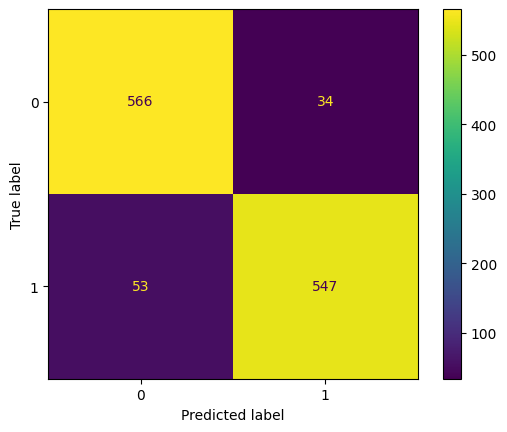

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

##Distinguish different category

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

In [ ]:
param_grid = {
    'logreg__solver': ['lbfgs', 'saga', 'liblinear'],
    'logreg__penalty': ['l2', 'elasticnet'],
    'logreg__C': [0.2, 0.3, 0.5, 0.7, 0.8, 1],
    'logreg__max_iter': [50, 80, 100, 120, 200, 500, 1000]
}

In [ ]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits
[CV 1/5] END logreg__C=0.2, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.759 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 2/5] END logreg__C=0.2, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.758 total time=   0.1s
[CV 3/5] END logreg__C=0.2, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.758 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 4/5] END logreg__C=0.2, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.779 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END logreg__C=0.2, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.762 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.2, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.734 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.2, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.729 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.2, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.718 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.2, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.751 total time=   0.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.2, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.731 total time=   1.1s
[CV 1/5] END logreg__C=0.2, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.742 total time=   0.8s
[CV 2/5] END logreg__C=0.2, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.754 total time=   0.8s
[CV 3/5] END logreg__C=0.2, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.733 total time=   0.3s
[CV 4/5] END logreg__C=0.2, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.767 total time=   0.3s
[CV 5/5] END logreg__C=0.2, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.747 total time=   0.3s
[CV 1/5] END logreg__C=0.2, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.2, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan tota

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 1/5] END logreg__C=0.2, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.758 total time=   0.2s
[CV 2/5] END logreg__C=0.2, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.755 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 3/5] END logreg__C=0.2, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.757 total time=   0.2s
[CV 4/5] END logreg__C=0.2, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.782 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END logreg__C=0.2, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.765 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.2, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.743 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.2, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.743 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.2, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.724 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.2, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.758 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.2, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.745 total time=   0.5s
[CV 1/5] END logreg__C=0.2, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.742 total time=   0.3s
[CV 2/5] END logreg__C=0.2, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.754 total time=   0.3s
[CV 3/5] END logreg__C=0.2, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.733 total time=   0.3s
[CV 4/5] END logreg__C=0.2, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.767 total time=   0.3s
[CV 5/5] END logreg__C=0.2, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.747 total time=   0.3s
[CV 1/5] END logreg__C=0.2, logreg__max_iter=80, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.2, logreg__max_iter=80, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan tota

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END logreg__C=0.2, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.758 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END logreg__C=0.2, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.756 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END logreg__C=0.2, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.757 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END logreg__C=0.2, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.781 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END logreg__C=0.2, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.764 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.2, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.745 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.2, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.747 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.2, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.731 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.2, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.761 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.2, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.750 total time=   1.0s
[CV 1/5] END logreg__C=0.2, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.742 total time=   0.4s
[CV 2/5] END logreg__C=0.2, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.754 total time=   0.4s
[CV 3/5] END logreg__C=0.2, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.733 total time=   0.4s
[CV 4/5] END logreg__C=0.2, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.767 total time=   0.4s
[CV 5/5] END logreg__C=0.2, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.747 total time=   0.3s
[CV 1/5] END logreg__C=0.2, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.2, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.2, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.749 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.2, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.750 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.2, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.733 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.2, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.764 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.2, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.750 total time=   0.6s
[CV 1/5] END logreg__C=0.2, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.742 total time=   0.3s
[CV 2/5] END logreg__C=0.2, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.754 total time=   0.3s
[CV 3/5] END logreg__C=0.2, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.733 total time=   0.3s
[CV 4/5] END logreg__C=0.2, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.767 total time=   0.3s
[CV 5/5] END logreg__C=0.2, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.747 total time=   0.3s
[CV 1/5] END logreg__C=0.2, logreg__max_iter=120, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.2, logreg__max_iter=120, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.2, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.757 total time=   1.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.2, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.750 total time=   1.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.2, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.744 total time=   2.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.2, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.776 total time=   1.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.2, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.756 total time=   1.1s
[CV 1/5] END logreg__C=0.2, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.742 total time=   0.3s
[CV 2/5] END logreg__C=0.2, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.754 total time=   0.3s
[CV 3/5] END logreg__C=0.2, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.733 total time=   0.3s
[CV 4/5] END logreg__C=0.2, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.767 total time=   0.3s
[CV 5/5] END logreg__C=0.2, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.747 total time=   0.3s
[CV 1/5] END logreg__C=0.2, logreg__max_iter=200, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.2, logreg__max_iter=200, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.2, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.759 total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.2, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.756 total time=   3.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.2, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.751 total time=   3.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.2, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.778 total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.2, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.760 total time=   2.7s
[CV 1/5] END logreg__C=0.2, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.742 total time=   0.3s
[CV 2/5] END logreg__C=0.2, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.754 total time=   0.3s
[CV 3/5] END logreg__C=0.2, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.733 total time=   0.3s
[CV 4/5] END logreg__C=0.2, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.767 total time=   0.3s
[CV 5/5] END logreg__C=0.2, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.747 total time=   0.3s
[CV 1/5] END logreg__C=0.2, logreg__max_iter=500, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.2, logreg__max_iter=500, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END logreg__C=0.3, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.759 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 2/5] END logreg__C=0.3, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.759 total time=   0.3s
[CV 3/5] END logreg__C=0.3, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.762 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 4/5] END logreg__C=0.3, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.784 total time=   0.1s
[CV 5/5] END logreg__C=0.3, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.759 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.3, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.734 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.3, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.729 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.3, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.719 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.3, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.751 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.3, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.731 total time=   0.5s
[CV 1/5] END logreg__C=0.3, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.743 total time=   0.5s
[CV 2/5] END logreg__C=0.3, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.756 total time=   0.4s
[CV 3/5] END logreg__C=0.3, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.735 total time=   0.3s
[CV 4/5] END logreg__C=0.3, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.771 total time=   0.3s
[CV 5/5] END logreg__C=0.3, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.753 total time=   0.3s
[CV 1/5] END logreg__C=0.3, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.3, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan tota

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 1/5] END logreg__C=0.3, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.760 total time=   0.2s
[CV 2/5] END logreg__C=0.3, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.759 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 3/5] END logreg__C=0.3, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.765 total time=   0.2s
[CV 4/5] END logreg__C=0.3, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.789 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END logreg__C=0.3, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.765 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.3, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.743 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.3, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.743 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.3, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.724 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.3, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.757 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.3, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.747 total time=   0.5s
[CV 1/5] END logreg__C=0.3, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.743 total time=   0.7s
[CV 2/5] END logreg__C=0.3, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.756 total time=   0.3s
[CV 3/5] END logreg__C=0.3, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.735 total time=   0.3s
[CV 4/5] END logreg__C=0.3, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.771 total time=   0.3s
[CV 5/5] END logreg__C=0.3, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.753 total time=   0.4s
[CV 1/5] END logreg__C=0.3, logreg__max_iter=80, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.3, logreg__max_iter=80, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan tota

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END logreg__C=0.3, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.761 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END logreg__C=0.3, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.764 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END logreg__C=0.3, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.764 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END logreg__C=0.3, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.786 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END logreg__C=0.3, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.766 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.3, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.745 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.3, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.747 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.3, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.731 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.3, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.760 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.3, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.751 total time=   0.5s
[CV 1/5] END logreg__C=0.3, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.743 total time=   0.4s
[CV 2/5] END logreg__C=0.3, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.756 total time=   0.3s
[CV 3/5] END logreg__C=0.3, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.735 total time=   0.3s
[CV 4/5] END logreg__C=0.3, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.771 total time=   0.3s
[CV 5/5] END logreg__C=0.3, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.753 total time=   0.3s
[CV 1/5] END logreg__C=0.3, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.3, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END logreg__C=0.3, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.762 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END logreg__C=0.3, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.764 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END logreg__C=0.3, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.764 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END logreg__C=0.3, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.785 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END logreg__C=0.3, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.767 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.3, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.749 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.3, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.749 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.3, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.736 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.3, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.765 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.3, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.749 total time=   0.7s
[CV 1/5] END logreg__C=0.3, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.743 total time=   0.3s
[CV 2/5] END logreg__C=0.3, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.756 total time=   0.3s
[CV 3/5] END logreg__C=0.3, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.735 total time=   0.4s
[CV 4/5] END logreg__C=0.3, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.771 total time=   0.4s
[CV 5/5] END logreg__C=0.3, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.753 total time=   0.4s
[CV 1/5] END logreg__C=0.3, logreg__max_iter=120, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.3, logreg__max_iter=120, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.3, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.757 total time=   1.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.3, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.752 total time=   1.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.3, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.746 total time=   1.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.3, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.775 total time=   1.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.3, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.755 total time=   1.1s
[CV 1/5] END logreg__C=0.3, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.743 total time=   0.3s
[CV 2/5] END logreg__C=0.3, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.756 total time=   0.3s
[CV 3/5] END logreg__C=0.3, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.735 total time=   0.3s
[CV 4/5] END logreg__C=0.3, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.771 total time=   0.3s
[CV 5/5] END logreg__C=0.3, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.753 total time=   0.3s
[CV 1/5] END logreg__C=0.3, logreg__max_iter=200, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.3, logreg__max_iter=200, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.3, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.760 total time=   3.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.3, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.757 total time=   3.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.3, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.754 total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.3, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.782 total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.3, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.759 total time=   3.8s
[CV 1/5] END logreg__C=0.3, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.743 total time=   0.3s
[CV 2/5] END logreg__C=0.3, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.756 total time=   0.3s
[CV 3/5] END logreg__C=0.3, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.735 total time=   0.3s
[CV 4/5] END logreg__C=0.3, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.771 total time=   0.3s
[CV 5/5] END logreg__C=0.3, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.753 total time=   0.3s
[CV 1/5] END logreg__C=0.3, logreg__max_iter=500, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.3, logreg__max_iter=500, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.3, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.756 total time=   5.3s
[CV 2/5] END logreg__C=0.3, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.762 total time=   6.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.3, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.762 total time=   5.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.3, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.785 total time=   6.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.3, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.768 total time=   5.3s
[CV 1/5] END logreg__C=0.3, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.743 total time=   0.3s
[CV 2/5] END logreg__C=0.3, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.756 total time=   0.3s
[CV 3/5] END logreg__C=0.3, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.735 total time=   0.3s
[CV 4/5] END logreg__C=0.3, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.771 total time=   0.3s
[CV 5/5] END logreg__C=0.3, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.753 total time=   0.3s
[CV 1/5] END logreg__C=0.3, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.3, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs;

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 1/5] END logreg__C=0.5, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.764 total time=   0.1s
[CV 2/5] END logreg__C=0.5, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.762 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 3/5] END logreg__C=0.5, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.764 total time=   0.1s
[CV 4/5] END logreg__C=0.5, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.790 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END logreg__C=0.5, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.764 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.5, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.733 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.5, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.730 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.5, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.720 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.5, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.750 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.5, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.732 total time=   0.5s
[CV 1/5] END logreg__C=0.5, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.746 total time=   0.5s
[CV 2/5] END logreg__C=0.5, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.762 total time=   0.4s
[CV 3/5] END logreg__C=0.5, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.745 total time=   0.4s
[CV 4/5] END logreg__C=0.5, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.775 total time=   0.4s
[CV 5/5] END logreg__C=0.5, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.758 total time=   0.4s
[CV 1/5] END logreg__C=0.5, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.5, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan tota

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 1/5] END logreg__C=0.5, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.771 total time=   0.2s
[CV 2/5] END logreg__C=0.5, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.770 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 3/5] END logreg__C=0.5, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.761 total time=   0.2s
[CV 4/5] END logreg__C=0.5, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.795 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END logreg__C=0.5, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.765 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.5, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.743 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.5, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.743 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.5, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.725 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.5, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.757 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.5, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.747 total time=   0.5s
[CV 1/5] END logreg__C=0.5, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.746 total time=   0.4s
[CV 2/5] END logreg__C=0.5, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.762 total time=   0.4s
[CV 3/5] END logreg__C=0.5, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.745 total time=   0.4s
[CV 4/5] END logreg__C=0.5, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.775 total time=   0.4s
[CV 5/5] END logreg__C=0.5, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.758 total time=   0.4s
[CV 1/5] END logreg__C=0.5, logreg__max_iter=80, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.5, logreg__max_iter=80, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan tota

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END logreg__C=0.5, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.770 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END logreg__C=0.5, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.769 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END logreg__C=0.5, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.761 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END logreg__C=0.5, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.793 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END logreg__C=0.5, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.765 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.5, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.746 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.5, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.747 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.5, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.733 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.5, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.760 total time=   0.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.5, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.749 total time=   1.0s
[CV 1/5] END logreg__C=0.5, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.746 total time=   0.5s
[CV 2/5] END logreg__C=0.5, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.762 total time=   0.5s
[CV 3/5] END logreg__C=0.5, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.745 total time=   0.4s
[CV 4/5] END logreg__C=0.5, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.775 total time=   0.4s
[CV 5/5] END logreg__C=0.5, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.758 total time=   0.4s
[CV 1/5] END logreg__C=0.5, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.5, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END logreg__C=0.5, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.771 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END logreg__C=0.5, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.769 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END logreg__C=0.5, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.764 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END logreg__C=0.5, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.793 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END logreg__C=0.5, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.766 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.5, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.747 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.5, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.748 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.5, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.738 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.5, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.766 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.5, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.750 total time=   0.7s
[CV 1/5] END logreg__C=0.5, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.746 total time=   0.4s
[CV 2/5] END logreg__C=0.5, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.762 total time=   0.4s
[CV 3/5] END logreg__C=0.5, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.745 total time=   0.4s
[CV 4/5] END logreg__C=0.5, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.775 total time=   0.4s
[CV 5/5] END logreg__C=0.5, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.758 total time=   0.4s
[CV 1/5] END logreg__C=0.5, logreg__max_iter=120, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.5, logreg__max_iter=120, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.5, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.757 total time=   1.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.5, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.753 total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.5, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.747 total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.5, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.779 total time=   1.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.5, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.757 total time=   1.1s
[CV 1/5] END logreg__C=0.5, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.746 total time=   0.4s
[CV 2/5] END logreg__C=0.5, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.762 total time=   0.4s
[CV 3/5] END logreg__C=0.5, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.745 total time=   0.4s
[CV 4/5] END logreg__C=0.5, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.775 total time=   0.4s
[CV 5/5] END logreg__C=0.5, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.758 total time=   0.4s
[CV 1/5] END logreg__C=0.5, logreg__max_iter=200, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.5, logreg__max_iter=200, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.5, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.757 total time=   3.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.5, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.764 total time=   3.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.5, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.758 total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.5, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.785 total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.5, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.761 total time=   3.9s
[CV 1/5] END logreg__C=0.5, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.746 total time=   0.6s
[CV 2/5] END logreg__C=0.5, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.762 total time=   0.5s
[CV 3/5] END logreg__C=0.5, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.745 total time=   0.4s
[CV 4/5] END logreg__C=0.5, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.775 total time=   0.4s
[CV 5/5] END logreg__C=0.5, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.758 total time=   0.4s
[CV 1/5] END logreg__C=0.5, logreg__max_iter=500, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.5, logreg__max_iter=500, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.5, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.765 total time=   5.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.5, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.766 total time=   6.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.5, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.766 total time=   5.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.5, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.792 total time=   6.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.5, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.766 total time=   5.3s
[CV 1/5] END logreg__C=0.5, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.746 total time=   0.4s
[CV 2/5] END logreg__C=0.5, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.762 total time=   0.4s
[CV 3/5] END logreg__C=0.5, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.745 total time=   0.4s
[CV 4/5] END logreg__C=0.5, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.775 total time=   0.4s
[CV 5/5] END logreg__C=0.5, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.758 total time=   0.4s
[CV 1/5] END logreg__C=0.5, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.5, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs;

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 1/5] END logreg__C=0.7, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.765 total time=   0.1s
[CV 2/5] END logreg__C=0.7, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.770 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 3/5] END logreg__C=0.7, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.766 total time=   0.1s
[CV 4/5] END logreg__C=0.7, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.792 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END logreg__C=0.7, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.768 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.7, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.733 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.7, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.730 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.7, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.720 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.7, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.751 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.7, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.732 total time=   0.5s
[CV 1/5] END logreg__C=0.7, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.750 total time=   0.6s
[CV 2/5] END logreg__C=0.7, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.767 total time=   0.4s
[CV 3/5] END logreg__C=0.7, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.751 total time=   0.4s
[CV 4/5] END logreg__C=0.7, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.779 total time=   0.4s
[CV 5/5] END logreg__C=0.7, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.761 total time=   0.4s
[CV 1/5] END logreg__C=0.7, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.7, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan tota

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 1/5] END logreg__C=0.7, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.776 total time=   0.2s
[CV 2/5] END logreg__C=0.7, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.771 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 3/5] END logreg__C=0.7, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.764 total time=   0.2s
[CV 4/5] END logreg__C=0.7, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.798 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END logreg__C=0.7, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.770 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.7, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.743 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.7, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.744 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.7, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.727 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.7, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.756 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.7, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.748 total time=   0.5s
[CV 1/5] END logreg__C=0.7, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.750 total time=   0.4s
[CV 2/5] END logreg__C=0.7, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.767 total time=   0.4s
[CV 3/5] END logreg__C=0.7, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.751 total time=   0.4s
[CV 4/5] END logreg__C=0.7, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.779 total time=   0.4s
[CV 5/5] END logreg__C=0.7, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.761 total time=   0.4s
[CV 1/5] END logreg__C=0.7, logreg__max_iter=80, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.7, logreg__max_iter=80, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan tota

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END logreg__C=0.7, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.775 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END logreg__C=0.7, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.775 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END logreg__C=0.7, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.764 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END logreg__C=0.7, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.795 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END logreg__C=0.7, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.772 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.7, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.746 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.7, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.748 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.7, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.733 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.7, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.760 total time=   1.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.7, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.748 total time=   1.0s
[CV 1/5] END logreg__C=0.7, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.750 total time=   0.6s
[CV 2/5] END logreg__C=0.7, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.767 total time=   0.4s
[CV 3/5] END logreg__C=0.7, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.751 total time=   0.4s
[CV 4/5] END logreg__C=0.7, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.779 total time=   0.4s
[CV 5/5] END logreg__C=0.7, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.761 total time=   0.4s
[CV 1/5] END logreg__C=0.7, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.7, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END logreg__C=0.7, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.773 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END logreg__C=0.7, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.775 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END logreg__C=0.7, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.762 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END logreg__C=0.7, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.797 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END logreg__C=0.7, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.771 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.7, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.748 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.7, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.748 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.7, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.739 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.7, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.766 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.7, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.750 total time=   0.7s
[CV 1/5] END logreg__C=0.7, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.750 total time=   0.4s
[CV 2/5] END logreg__C=0.7, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.767 total time=   0.4s
[CV 3/5] END logreg__C=0.7, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.751 total time=   0.4s
[CV 4/5] END logreg__C=0.7, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.779 total time=   0.4s
[CV 5/5] END logreg__C=0.7, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.761 total time=   0.4s
[CV 1/5] END logreg__C=0.7, logreg__max_iter=120, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.7, logreg__max_iter=120, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.7, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.757 total time=   2.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.7, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.752 total time=   1.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.7, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.747 total time=   1.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.7, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.778 total time=   1.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.7, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.756 total time=   1.1s
[CV 1/5] END logreg__C=0.7, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.750 total time=   0.4s
[CV 2/5] END logreg__C=0.7, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.767 total time=   0.4s
[CV 3/5] END logreg__C=0.7, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.751 total time=   0.4s
[CV 4/5] END logreg__C=0.7, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.779 total time=   0.4s
[CV 5/5] END logreg__C=0.7, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.761 total time=   0.4s
[CV 1/5] END logreg__C=0.7, logreg__max_iter=200, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.7, logreg__max_iter=200, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.7, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.758 total time=   3.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.7, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.766 total time=   2.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.7, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.762 total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.7, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.787 total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.7, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.762 total time=   2.9s
[CV 1/5] END logreg__C=0.7, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.750 total time=   0.5s
[CV 2/5] END logreg__C=0.7, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.767 total time=   0.5s
[CV 3/5] END logreg__C=0.7, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.751 total time=   0.5s
[CV 4/5] END logreg__C=0.7, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.779 total time=   0.5s
[CV 5/5] END logreg__C=0.7, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.761 total time=   0.4s
[CV 1/5] END logreg__C=0.7, logreg__max_iter=500, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.7, logreg__max_iter=500, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.7, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.768 total time=   5.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.7, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.769 total time=   6.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.7, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.768 total time=   5.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.7, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.792 total time=   7.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.7, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.766 total time=   5.3s
[CV 1/5] END logreg__C=0.7, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.750 total time=   0.4s
[CV 2/5] END logreg__C=0.7, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.767 total time=   0.4s
[CV 3/5] END logreg__C=0.7, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.751 total time=   0.4s
[CV 4/5] END logreg__C=0.7, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.779 total time=   0.4s
[CV 5/5] END logreg__C=0.7, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.761 total time=   0.4s
[CV 1/5] END logreg__C=0.7, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.7, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs;

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 1/5] END logreg__C=0.8, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.767 total time=   0.1s
[CV 2/5] END logreg__C=0.8, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.767 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 3/5] END logreg__C=0.8, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.762 total time=   0.1s
[CV 4/5] END logreg__C=0.8, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.791 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END logreg__C=0.8, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.765 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.8, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.734 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.8, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.730 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.8, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.720 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.8, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.751 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.8, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.732 total time=   0.5s
[CV 1/5] END logreg__C=0.8, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.749 total time=   0.5s
[CV 2/5] END logreg__C=0.8, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.768 total time=   0.5s
[CV 3/5] END logreg__C=0.8, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.751 total time=   0.6s
[CV 4/5] END logreg__C=0.8, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.779 total time=   0.6s
[CV 5/5] END logreg__C=0.8, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.766 total time=   0.4s
[CV 1/5] END logreg__C=0.8, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.8, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan tota

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 1/5] END logreg__C=0.8, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.774 total time=   0.2s
[CV 2/5] END logreg__C=0.8, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.771 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 3/5] END logreg__C=0.8, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.765 total time=   0.2s
[CV 4/5] END logreg__C=0.8, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.797 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END logreg__C=0.8, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.774 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.8, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.743 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.8, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.744 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.8, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.727 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.8, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.757 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.8, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.747 total time=   0.5s
[CV 1/5] END logreg__C=0.8, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.749 total time=   0.4s
[CV 2/5] END logreg__C=0.8, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.768 total time=   0.4s
[CV 3/5] END logreg__C=0.8, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.751 total time=   0.4s
[CV 4/5] END logreg__C=0.8, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.779 total time=   0.4s
[CV 5/5] END logreg__C=0.8, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.766 total time=   0.4s
[CV 1/5] END logreg__C=0.8, logreg__max_iter=80, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.8, logreg__max_iter=80, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan tota

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END logreg__C=0.8, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.772 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END logreg__C=0.8, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.772 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END logreg__C=0.8, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.766 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END logreg__C=0.8, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.795 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END logreg__C=0.8, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.769 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.8, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.747 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.8, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.748 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.8, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.734 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.8, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.760 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.8, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.749 total time=   0.6s
[CV 1/5] END logreg__C=0.8, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.749 total time=   0.5s
[CV 2/5] END logreg__C=0.8, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.768 total time=   0.5s
[CV 3/5] END logreg__C=0.8, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.751 total time=   0.5s
[CV 4/5] END logreg__C=0.8, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.779 total time=   0.6s
[CV 5/5] END logreg__C=0.8, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.766 total time=   0.5s
[CV 1/5] END logreg__C=0.8, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.8, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END logreg__C=0.8, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.772 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END logreg__C=0.8, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.775 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END logreg__C=0.8, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.764 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END logreg__C=0.8, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.796 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END logreg__C=0.8, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.773 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.8, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.748 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.8, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.748 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.8, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.740 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.8, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.767 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.8, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.750 total time=   0.7s
[CV 1/5] END logreg__C=0.8, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.749 total time=   0.4s
[CV 2/5] END logreg__C=0.8, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.768 total time=   0.4s
[CV 3/5] END logreg__C=0.8, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.751 total time=   0.4s
[CV 4/5] END logreg__C=0.8, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.779 total time=   0.4s
[CV 5/5] END logreg__C=0.8, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.766 total time=   0.4s
[CV 1/5] END logreg__C=0.8, logreg__max_iter=120, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.8, logreg__max_iter=120, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.8, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.757 total time=   1.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.8, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.754 total time=   2.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.8, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.746 total time=   1.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.8, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.778 total time=   1.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.8, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.756 total time=   1.2s
[CV 1/5] END logreg__C=0.8, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.749 total time=   0.4s
[CV 2/5] END logreg__C=0.8, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.768 total time=   0.4s
[CV 3/5] END logreg__C=0.8, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.751 total time=   0.4s
[CV 4/5] END logreg__C=0.8, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.779 total time=   0.4s
[CV 5/5] END logreg__C=0.8, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.766 total time=   0.4s
[CV 1/5] END logreg__C=0.8, logreg__max_iter=200, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.8, logreg__max_iter=200, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.8, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.759 total time=   2.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.8, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.766 total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.8, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.761 total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.8, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.789 total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.8, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.761 total time=   2.6s
[CV 1/5] END logreg__C=0.8, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.749 total time=   0.4s
[CV 2/5] END logreg__C=0.8, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.768 total time=   0.5s
[CV 3/5] END logreg__C=0.8, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.751 total time=   0.5s
[CV 4/5] END logreg__C=0.8, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.779 total time=   0.5s
[CV 5/5] END logreg__C=0.8, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.766 total time=   0.5s
[CV 1/5] END logreg__C=0.8, logreg__max_iter=500, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.8, logreg__max_iter=500, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=0.8, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.770 total time=   5.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=0.8, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.771 total time=   6.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=0.8, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.766 total time=   5.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=0.8, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.792 total time=   6.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=0.8, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.767 total time=   5.4s
[CV 1/5] END logreg__C=0.8, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.749 total time=   0.4s
[CV 2/5] END logreg__C=0.8, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.768 total time=   0.4s
[CV 3/5] END logreg__C=0.8, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.751 total time=   0.4s
[CV 4/5] END logreg__C=0.8, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.779 total time=   0.4s
[CV 5/5] END logreg__C=0.8, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.766 total time=   0.4s
[CV 1/5] END logreg__C=0.8, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=0.8, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs;

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 1/5] END logreg__C=1, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.765 total time=   0.1s
[CV 2/5] END logreg__C=1, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.772 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 3/5] END logreg__C=1, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.760 total time=   0.2s
[CV 4/5] END logreg__C=1, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.793 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END logreg__C=1, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.766 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=1, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.734 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=1, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.730 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=1, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.720 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=1, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.750 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=1, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=saga;, score=0.732 total time=   0.3s
[CV 1/5] END logreg__C=1, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.749 total time=   0.4s
[CV 2/5] END logreg__C=1, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.765 total time=   0.6s
[CV 3/5] END logreg__C=1, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.753 total time=   0.6s
[CV 4/5] END logreg__C=1, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.784 total time=   0.5s
[CV 5/5] END logreg__C=1, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear;, score=0.762 total time=   0.6s
[CV 1/5] END logreg__C=1, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=1, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END logreg__C=1, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.777 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 2/5] END logreg__C=1, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.770 total time=   0.2s
[CV 3/5] END logreg__C=1, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.768 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 4/5] END logreg__C=1, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.796 total time=   0.2s
[CV 5/5] END logreg__C=1, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.774 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=1, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.743 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=1, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.744 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=1, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.727 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=1, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.757 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=1, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=saga;, score=0.748 total time=   0.4s
[CV 1/5] END logreg__C=1, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.749 total time=   0.4s
[CV 2/5] END logreg__C=1, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.765 total time=   0.4s
[CV 3/5] END logreg__C=1, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.753 total time=   0.4s
[CV 4/5] END logreg__C=1, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.784 total time=   0.4s
[CV 5/5] END logreg__C=1, logreg__max_iter=80, logreg__penalty=l2, logreg__solver=liblinear;, score=0.762 total time=   0.4s
[CV 1/5] END logreg__C=1, logreg__max_iter=80, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=1, logreg__max_iter=80, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END logreg__C=1, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.775 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END logreg__C=1, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.778 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END logreg__C=1, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.766 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END logreg__C=1, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.801 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END logreg__C=1, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.774 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=1, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.747 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=1, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.748 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=1, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.734 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=1, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.760 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=1, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga;, score=0.749 total time=   0.6s
[CV 1/5] END logreg__C=1, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.749 total time=   0.4s
[CV 2/5] END logreg__C=1, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.765 total time=   0.5s
[CV 3/5] END logreg__C=1, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.753 total time=   0.6s
[CV 4/5] END logreg__C=1, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.784 total time=   0.5s
[CV 5/5] END logreg__C=1, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear;, score=0.762 total time=   0.6s
[CV 1/5] END logreg__C=1, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=1, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time= 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END logreg__C=1, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.772 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END logreg__C=1, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.778 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END logreg__C=1, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.767 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END logreg__C=1, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.798 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END logreg__C=1, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=lbfgs;, score=0.779 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=1, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.749 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=1, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.748 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=1, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.740 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=1, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.765 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=1, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=saga;, score=0.750 total time=   0.7s
[CV 1/5] END logreg__C=1, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.749 total time=   0.4s
[CV 2/5] END logreg__C=1, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.765 total time=   0.4s
[CV 3/5] END logreg__C=1, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.753 total time=   0.4s
[CV 4/5] END logreg__C=1, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.784 total time=   0.4s
[CV 5/5] END logreg__C=1, logreg__max_iter=120, logreg__penalty=l2, logreg__solver=liblinear;, score=0.762 total time=   0.4s
[CV 1/5] END logreg__C=1, logreg__max_iter=120, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=1, logreg__max_iter=120, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time= 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=1, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.757 total time=   1.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=1, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.754 total time=   1.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=1, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.747 total time=   1.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=1, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.779 total time=   1.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=1, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=saga;, score=0.757 total time=   1.1s
[CV 1/5] END logreg__C=1, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.749 total time=   0.4s
[CV 2/5] END logreg__C=1, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.765 total time=   0.4s
[CV 3/5] END logreg__C=1, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.753 total time=   0.4s
[CV 4/5] END logreg__C=1, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.784 total time=   0.4s
[CV 5/5] END logreg__C=1, logreg__max_iter=200, logreg__penalty=l2, logreg__solver=liblinear;, score=0.762 total time=   0.4s
[CV 1/5] END logreg__C=1, logreg__max_iter=200, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=1, logreg__max_iter=200, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time= 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=1, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.762 total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=1, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.764 total time=   3.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=1, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.760 total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=1, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.790 total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=1, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=saga;, score=0.762 total time=   2.6s
[CV 1/5] END logreg__C=1, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.749 total time=   0.4s
[CV 2/5] END logreg__C=1, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.765 total time=   0.4s
[CV 3/5] END logreg__C=1, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.753 total time=   0.4s
[CV 4/5] END logreg__C=1, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.784 total time=   0.6s
[CV 5/5] END logreg__C=1, logreg__max_iter=500, logreg__penalty=l2, logreg__solver=liblinear;, score=0.762 total time=   0.6s
[CV 1/5] END logreg__C=1, logreg__max_iter=500, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=1, logreg__max_iter=500, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time= 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END logreg__C=1, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.771 total time=   5.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END logreg__C=1, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.772 total time=   6.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END logreg__C=1, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.766 total time=   5.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END logreg__C=1, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.794 total time=   7.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END logreg__C=1, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=saga;, score=0.767 total time=   5.3s
[CV 1/5] END logreg__C=1, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.749 total time=   0.4s
[CV 2/5] END logreg__C=1, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.765 total time=   0.4s
[CV 3/5] END logreg__C=1, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.753 total time=   0.4s
[CV 4/5] END logreg__C=1, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.784 total time=   0.4s
[CV 5/5] END logreg__C=1, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear;, score=0.762 total time=   0.4s
[CV 1/5] END logreg__C=1, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END logreg__C=1, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs;, score=nan tota

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
630 fits failed out of a total of 1260.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'logreg__C': [0.2, 0.3, 0.5, 0.7, 0.8, 1],
                         'logreg__max_iter': [50, 80, 100, 120, 200, 500, 1000],
                         'logreg__penalty': ['l2', 'elasticnet'],
                         'logreg__solver': ['lbfgs', 'saga', 'liblinear']},
             verbose=3)

In [ ]:
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

best_svm = grid_search.best_estimator_
test_accuracy = best_svm.score(X_test, y_test)

print("Test set accuracy with best parameters:", test_accuracy)

Best parameters found:  {'logreg__C': 1, 'logreg__max_iter': 100, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}
Best score:  0.77875
Test set accuracy with best parameters: 0.7608333333333334


In [ ]:
best_lr = make_pipeline(StandardScaler(), LogisticRegression(C=1, max_iter=100, penalty='l2', solver='lbfgs'))
best_lr.fit(X_train, y_train)

y_pred = best_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7608333333333334


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


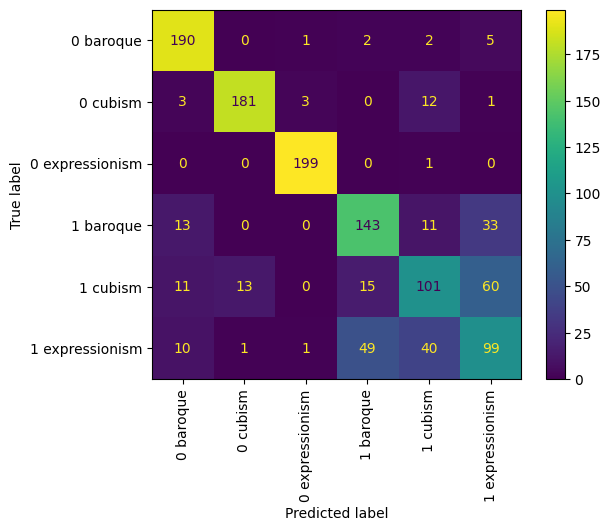

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=best_lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_lr.classes_)
disp.plot()
plt.xticks(rotation=90)
plt.show()

#MLP

##Set up dataset

In [ ]:
scaler = StandardScaler()
df = pd.read_csv('') # Replace the path to the dataset to the working one
df.dropna(inplace=True)
columns_drop = ['category', 'image', 'label', 'style']
X = df.drop(columns_drop, axis=1)
X_norm = scaler.fit_transform(X)
y = df['label']
y_category = df['category']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, stratify=y_category, random_state=42)

##Distinguish AI and Human

In [ ]:
mlp = MLPClassifier()

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50),],
    'activation': ['identity', 'logistic', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.05],
    'max_iter': [200, 300, 1000],
    'random_state': [30,40,50],
    'learning_rate_init': [0.0001]
}

In [ ]:
grid = GridSearchCV(mlp, param_grid, verbose=5)

In [ ]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.894 total time=   3.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.891 total time=   3.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.898 total time=   3.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.902 total time=   7.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.903 total time=   3.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.894 total time=   3.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.894 total time=   4.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.900 total time=   3.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.896 total time=   3.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.902 total time=   3.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.895 total time=   4.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.895 total time=   3.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.898 total time=   3.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.905 total time=   3.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.903 total time=   5.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.899 total time=   4.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.899 total time=   7.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.906 total time=   4.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.911 total time=   4.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.905 total time=   6.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.898 total time=   4.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.904 total time=   6.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.907 total time=   4.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.908 total time=   4.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.905 total time=   6.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.899 total time=   4.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.900 total time=   6.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.905 total time=   4.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.911 total time=   5.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.904 total time=   5.6s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.909 total time=  15.0s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.910 total time=  11.2s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.911 total time=  11.4s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.925 total time=  12.4s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.898 total time=   3.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.901 total time=   4.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.903 total time=   5.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.908 total time=   3.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.907 total time=   4.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.899 total time=   5.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.900 total time=   3.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.905 total time=   5.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.910 total time=   4.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.905 total time=   3.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.899 total time=   5.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.901 total time=   4.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.904 total time=   3.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.908 total time=   5.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.906 total time=   3.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.900 total time=   5.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.902 total time=   7.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.910 total time=   5.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.915 total time=   7.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.909 total time=   6.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.904 total time=   7.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.905 total time=   6.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.911 total time=   6.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.917 total time=   6.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.914 total time=   6.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.902 total time=   7.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.908 total time=   6.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.909 total time=   7.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.919 total time=   5.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.910 total time=   7.8s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.910 total time=  15.9s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.919 total time=  17.9s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.921 total time=  15.5s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.936 total time=  22.2s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.908 total time=   6.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.905 total time=   4.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.912 total time=   6.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.921 total time=   4.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.906 total time=   5.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.906 total time=   5.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.911 total time=   4.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.921 total time=   6.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.919 total time=   4.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.910 total time=   6.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.907 total time=   4.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.903 total time=   4.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.911 total time=   6.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.916 total time=   4.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.905 total time=   6.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.914 total time=   7.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.905 total time=   9.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.918 total time=   8.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.926 total time=   7.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.917 total time=   9.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.908 total time=   7.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.915 total time=   9.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.922 total time=   9.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.929 total time=   7.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.917 total time=   9.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.906 total time=   9.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.914 total time=   7.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.916 total time=   9.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.921 total time=   8.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.915 total time=   8.5s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.912 total time=  12.5s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.916 total time=  13.5s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.923 total time=  15.9s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.934 total time=  16.2s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.894 total time=   3.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.890 total time=   3.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.898 total time=   4.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.902 total time=   3.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.902 total time=   3.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.894 total time=   5.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.893 total time=   3.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.900 total time=   3.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.895 total time=   3.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.902 total time=   4.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.893 total time=   3.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.895 total time=   3.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.899 total time=   3.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.905 total time=   4.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.903 total time=   3.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.899 total time=   4.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.898 total time=   6.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.905 total time=   4.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.911 total time=   6.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.906 total time=   4.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.898 total time=   5.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.902 total time=   6.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.907 total time=   4.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.907 total time=   6.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.904 total time=   4.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.898 total time=   5.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.900 total time=   5.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.905 total time=   4.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.911 total time=   6.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.904 total time=   4.7s
[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.909 total time=  13.5s
[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.909 total time=  11.3s
[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.912 total time=  10.7s
[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.927 total time=  12.0s
[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.898 total time=   5.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.901 total time=   3.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.903 total time=   4.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.908 total time=   5.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.905 total time=   3.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.899 total time=   5.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.901 total time=   4.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.905 total time=   3.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.910 total time=   5.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.905 total time=   4.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.899 total time=   4.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.900 total time=   5.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.905 total time=   3.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.908 total time=   3.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.906 total time=   5.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.900 total time=   5.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.902 total time=   8.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.910 total time=   5.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.915 total time=   8.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.909 total time=   5.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.903 total time=   7.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.906 total time=   5.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.910 total time=   7.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.916 total time=   5.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.914 total time=   7.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.901 total time=   5.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.908 total time=   7.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.909 total time=   5.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.918 total time=   7.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.911 total time=   5.9s
[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.910 total time=  15.1s
[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.919 total time=  17.8s
[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.919 total time=  13.2s
[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.935 total time=  20.4s
[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, r

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.908 total time=   4.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.905 total time=   5.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.912 total time=   6.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.921 total time=   4.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.906 total time=   6.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.906 total time=   4.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.910 total time=   6.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.921 total time=   4.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.919 total time=   5.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.910 total time=   6.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.907 total time=   4.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.903 total time=   6.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.911 total time=   4.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.916 total time=   6.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.905 total time=   4.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.912 total time=   9.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.906 total time=   7.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.918 total time=   9.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.926 total time=   8.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.916 total time=   8.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.908 total time=   9.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.915 total time=   7.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.923 total time=   9.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.929 total time=   8.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.917 total time=   7.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.906 total time=   9.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.912 total time=   8.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.916 total time=   7.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.921 total time=   9.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.914 total time=   7.1s
[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.914 total time=  12.4s
[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.916 total time=  13.4s
[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.923 total time=  13.9s
[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.934 total time=  15.2s
[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.864 total time=   4.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.869 total time=   5.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.879 total time=   4.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.877 total time=   4.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.884 total time=   6.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.865 total time=   4.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.868 total time=   4.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.877 total time=   5.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.877 total time=   4.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.883 total time=   5.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.864 total time=   4.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.867 total time=   4.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.877 total time=   6.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.874 total time=   4.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.879 total time=   4.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.887 total time=   8.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.884 total time=   6.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.889 total time=   8.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.894 total time=   6.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.899 total time=   7.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.887 total time=   7.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.882 total time=   6.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.890 total time=   8.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.896 total time=   6.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.899 total time=   8.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.885 total time=   6.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.883 total time=   7.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.889 total time=   6.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.894 total time=   8.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.899 total time=   6.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.933 total time=  24.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.926 total time=  24.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.930 total time=  24.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.938 total time=  24.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.925 total time=  22.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.936 total time=  24.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.926 total time=  24.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.932 total time=  24.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.938 total time=  24.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.924 total time=  22.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.933 total time=  24.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.925 total time=  24.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.929 total time=  24.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.936 total time=  23.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.923 total time=  22.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.872 total time=   7.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.874 total time=   5.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.884 total time=   7.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.877 total time=   5.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.886 total time=   7.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.879 total time=   5.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.876 total time=   7.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.886 total time=   5.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.895 total time=   7.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.896 total time=   5.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.881 total time=   7.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.876 total time=   5.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.886 total time=   7.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.891 total time=   5.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.893 total time=   7.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.886 total time=  10.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.893 total time=   8.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.895 total time=  10.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.899 total time=  10.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.905 total time=  10.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.893 total time=   9.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.896 total time=   9.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.903 total time=  10.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.903 total time=  10.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.910 total time=  10.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.891 total time=   9.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.896 total time=  10.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.901 total time=  10.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.905 total time=  10.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.907 total time=   8.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.934 total time=  34.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.936 total time=  32.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.938 total time=  34.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.944 total time=  34.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.929 total time=  33.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.935 total time=  34.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.936 total time=  32.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.939 total time=  34.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.948 total time=  32.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.930 total time=  34.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.934 total time=  32.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.934 total time=  35.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.940 total time=  32.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.947 total time=  34.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.930 total time=  34.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.881 total time=   7.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.887 total time=   8.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.893 total time=   6.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.898 total time=   8.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.899 total time=   7.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.884 total time=   7.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.886 total time=   8.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.887 total time=   6.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.894 total time=   8.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.903 total time=   7.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.881 total time=   8.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.883 total time=   8.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.892 total time=   6.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.895 total time=   8.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.900 total time=   6.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.906 total time=  12.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.907 total time=  12.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.915 total time=  12.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.917 total time=  12.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.912 total time=  12.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.905 total time=  12.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.910 total time=  12.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.907 total time=  11.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.917 total time=  10.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.907 total time=  12.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.907 total time=  12.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.910 total time=  12.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.917 total time=  12.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.916 total time=  12.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.906 total time=  11.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.940 total time=  39.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.944 total time=  39.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.942 total time=  38.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.955 total time=  39.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.942 total time=  38.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.940 total time=  38.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.946 total time=  39.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.940 total time=  39.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.952 total time=  39.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.941 total time=  39.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.941 total time=  39.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.946 total time=  39.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.947 total time=  39.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.956 total time=  39.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.946 total time=  39.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.861 total time=   5.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.870 total time=   4.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.874 total time=   4.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.877 total time=   6.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.883 total time=   4.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.865 total time=   4.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.868 total time=   6.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.876 total time=   4.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.873 total time=   4.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.880 total time=   6.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.864 total time=   4.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.867 total time=   4.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.876 total time=   5.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.870 total time=   4.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.880 total time=   5.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.887 total time=   6.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.885 total time=   8.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.889 total time=   6.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.894 total time=   8.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.897 total time=   6.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.889 total time=   8.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.882 total time=   6.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.890 total time=   8.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.894 total time=   6.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.898 total time=   8.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.884 total time=   6.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.882 total time=   7.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.890 total time=   8.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.894 total time=   7.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.898 total time=   9.0s
[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.932 total time=  21.4s
[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.925 total time=  22.9s
[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.926 total time=  21.0s
[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.932 total time=  19.8s
[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.871 total time=   7.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.874 total time=   5.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.886 total time=   7.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.877 total time=   5.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.887 total time=   7.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.880 total time=   5.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.875 total time=   7.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.886 total time=   5.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.892 total time=   7.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.892 total time=   5.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.882 total time=   7.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.878 total time=   5.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.886 total time=   7.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.887 total time=   5.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.892 total time=   7.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.889 total time=  10.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.894 total time=   9.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.893 total time=  10.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.896 total time=  10.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.904 total time=  10.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.894 total time=   8.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.896 total time=  10.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.901 total time=  10.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.900 total time=  10.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.906 total time=   8.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.892 total time=  10.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.895 total time=  10.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.900 total time=  10.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.900 total time=   8.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.908 total time=  10.5s
[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.932 total time=  27.8s
[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.933 total time=  33.8s
[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.930 total time=  28.1s
[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.936 total time=  28.8s
[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, r

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.883 total time=   8.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.885 total time=   7.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.890 total time=   7.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.899 total time=   8.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.897 total time=   6.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.883 total time=   8.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.885 total time=   7.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.890 total time=   8.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.893 total time=   8.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.899 total time=   6.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.882 total time=   8.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.884 total time=   6.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.895 total time=   8.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.892 total time=   8.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.897 total time=   6.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.901 total time=  11.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.907 total time=  12.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.909 total time=  12.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.912 total time=  11.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.910 total time=  12.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.900 total time=  10.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.905 total time=  11.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.905 total time=  12.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.912 total time=  12.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.906 total time=  12.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.904 total time=  12.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.907 total time=  12.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.912 total time=  11.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.915 total time=  11.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.907 total time=  10.7s
[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.940 total time=  35.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.941 total time=  38.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.940 total time=  39.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.952 total time=  39.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.933 total time=  39.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.935 total time=  39.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.939 total time=  39.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.941 total time=  39.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.952 total time=  38.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.936 total time=  38.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.936 total time=  39.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.939 total time=  38.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.942 total time=  39.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.951 total time=  39.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.935 total time=  39.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.921 total time=   4.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.925 total time=   5.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.928 total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.940 total time=   3.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.927 total time=   5.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.915 total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.924 total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.926 total time=   5.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.932 total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.925 total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.915 total time=   5.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.927 total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.925 total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.941 total time=   5.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.924 total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.927 total time=   6.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.931 total time=   6.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.932 total time=   6.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.946 total time=   6.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.932 total time=   6.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.924 total time=   7.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.933 total time=   5.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.931 total time=   7.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.946 total time=   5.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.930 total time=   7.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.927 total time=   5.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.932 total time=   7.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.931 total time=   5.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.946 total time=   7.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.929 total time=   5.5s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.947 total time=  19.9s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.948 total time=  17.9s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.957 total time=  18.8s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.966 total time=  19.0s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, so

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.960 total time=  22.0s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.950 total time=  19.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.932 total time=   6.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.934 total time=   5.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.930 total time=   5.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.948 total time=   6.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.929 total time=   5.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.923 total time=   6.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.936 total time=   5.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.929 total time=   7.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.942 total time=   5.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.933 total time=   5.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.930 total time=   6.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.933 total time=   5.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.929 total time=   6.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.948 total time=   5.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.934 total time=   6.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.942 total time=   7.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.941 total time=   9.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.939 total time=   9.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.956 total time=   7.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.936 total time=   9.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.938 total time=   9.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.945 total time=   7.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.938 total time=   9.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.948 total time=   9.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.938 total time=   7.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.939 total time=   9.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.942 total time=   8.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.939 total time=   8.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.954 total time=   9.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.938 total time=   8.2s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.959 total time=  29.4s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.952 total time=  26.9s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.953 total time=  19.6s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.971 total time=  27.0s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.934 total time=   5.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.945 total time=   7.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.945 total time=   5.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.958 total time=   7.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.933 total time=   5.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.938 total time=   7.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.945 total time=   5.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.940 total time=   7.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.958 total time=   5.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.941 total time=   7.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.941 total time=   5.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.942 total time=   7.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.941 total time=   6.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.953 total time=   7.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.940 total time=   6.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.945 total time=   9.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.949 total time=  10.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.949 total time=  10.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.961 total time=  10.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.945 total time=   8.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.952 total time=  10.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.955 total time=  10.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.947 total time=  10.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.966 total time=   9.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.941 total time=  10.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.951 total time=  10.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.946 total time=  10.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.950 total time=  10.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.963 total time=   9.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.948 total time=  10.5s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.958 total time=  31.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.954 total time=  31.2s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.961 total time=  31.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.974 total time=  34.8s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.959 total time=  29.3s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.963 total time=  29.7s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.959 total time=  32.5s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.958 total time=  24.0s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, 

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.951 total time=  33.9s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.956 total time=  29.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.969 total time=  28.6s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.966 total time=  32.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.921 total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.925 total time=   3.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.928 total time=   5.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.940 total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.925 total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.914 total time=   5.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.925 total time=   3.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.926 total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.933 total time=   5.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.925 total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.912 total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.927 total time=   5.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.925 total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.940 total time=   3.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.924 total time=   5.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.926 total time=   5.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.931 total time=   7.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.934 total time=   5.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.946 total time=   7.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.932 total time=   5.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.925 total time=   7.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.932 total time=   5.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.932 total time=   7.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.946 total time=   5.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.930 total time=   7.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.927 total time=   5.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.931 total time=   6.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.932 total time=   6.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.945 total time=   6.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.929 total time=   6.4s
[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.948 total time=  15.4s
[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.947 total time=  17.3s
[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.954 total time=  18.8s
[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.964 total time=  18.0s
[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, 

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.933 total time=   5.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.933 total time=   6.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.930 total time=   5.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.947 total time=   6.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.929 total time=   5.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.923 total time=   7.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.933 total time=   5.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.930 total time=   5.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.942 total time=   6.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.934 total time=   5.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.930 total time=   6.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.933 total time=   4.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.928 total time=   6.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.948 total time=   5.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.933 total time=   6.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.941 total time=   8.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.940 total time=   9.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.936 total time=   7.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.955 total time=   9.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.935 total time=   9.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.938 total time=   7.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.944 total time=   9.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.936 total time=   9.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.948 total time=   7.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.938 total time=   9.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.940 total time=   9.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.940 total time=   7.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.939 total time=   9.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.952 total time=  10.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.938 total time=   9.4s
[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.955 total time=  21.9s
[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.952 total time=  19.6s
[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.953 total time=  20.5s
[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.968 total time=  23.6s
[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=a

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.932 total time=   7.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.945 total time=   6.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.944 total time=   7.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.959 total time=   6.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.934 total time=   7.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.936 total time=   5.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.944 total time=   7.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.941 total time=   5.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.959 total time=   7.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.942 total time=   6.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.938 total time=   7.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.942 total time=   5.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.943 total time=   7.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.953 total time=   5.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.938 total time=   7.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.945 total time=   9.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.947 total time=   9.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.948 total time=  10.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.960 total time=  10.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.944 total time=  10.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.952 total time=   8.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.953 total time=  10.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.946 total time=  10.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.965 total time=  10.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.945 total time=   9.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.950 total time=  10.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.947 total time=  10.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.950 total time=  10.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.961 total time=  10.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.947 total time=   8.8s
[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.965 total time=  28.4s
[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.955 total time=  30.9s
[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.958 total time=  31.3s
[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.972 total time=  29.0s
[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['identity', 'logistic', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                         'learning_rate_init': [0.0001],
                         'max_iter': [200, 300, 1000],
                         'random_state': [30, 40, 50], 'solver': ['adam']},
             verbose=5)

In [ ]:
print("Best parameters found: ", grid.best_params_)
print("Best score: ", grid.best_score_)

best_svm = grid.best_estimator_
test_accuracy = best_svm.score(X_test, y_test)

print("Test set accuracy with best parameters:", test_accuracy)

Best parameters found:  {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.0001, 'max_iter': 1000, 'random_state': 40, 'solver': 'adam'}
Best score:  0.963125
Test set accuracy with best parameters: 0.9758333333333333


In [ ]:
clf = MLPClassifier(alpha = 0.05, hidden_layer_sizes= (50,50), activation='relu', solver='adam', random_state=40, learning_rate_init=0.0001, max_iter=1000).fit(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

0.9758333333333333

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

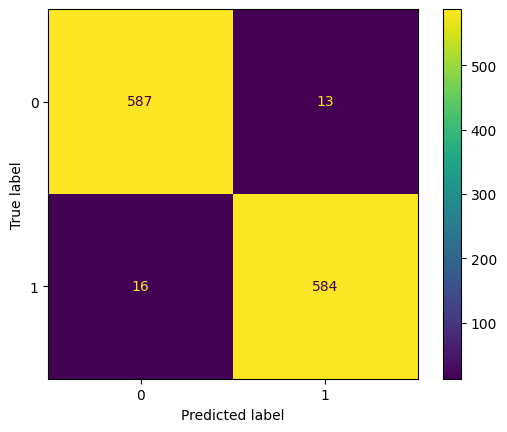

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

##Distinguish different categories

In [ ]:
mlp = MLPClassifier()

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50),],
    'activation': ['identity', 'logistic', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.05],
    'max_iter': [200, 300, 1000],
    'random_state': [30,40,50],
    'learning_rate_init': [0.0001]
}

In [ ]:
grid = GridSearchCV(mlp, param_grid, verbose=5)

In [ ]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.736 total time=   7.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.719 total time=   3.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.724 total time=   3.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.745 total time=   5.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.733 total time=   3.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.738 total time=   3.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.732 total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.740 total time=   5.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.752 total time=   3.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.740 total time=   3.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.729 total time=   5.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.730 total time=   3.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.725 total time=   3.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.746 total time=   5.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.731 total time=   3.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.750 total time=   5.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.740 total time=   7.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.732 total time=   5.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.764 total time=   7.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.746 total time=   5.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.750 total time=   7.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.748 total time=   5.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.749 total time=   6.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.768 total time=   5.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.755 total time=   5.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.747 total time=   7.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.740 total time=   5.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.735 total time=   7.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.761 total time=   5.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.746 total time=   7.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.769 total time=  19.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.771 total time=  20.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.759 total time=  20.0s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.791 total time=  20.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.769 total time=  19.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.766 total time=  20.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.767 total time=  19.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.766 total time=  21.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.791 total time=  19.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.765 total time=  21.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.765 total time=  19.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.766 total time=  21.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.759 total time=  19.4s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.792 total time=  20.5s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.769 total time=  18.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.757 total time=   6.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.743 total time=   4.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.738 total time=   5.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.758 total time=   4.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.753 total time=   4.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.759 total time=   6.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.741 total time=   4.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.739 total time=   4.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.762 total time=   6.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.747 total time=   4.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.755 total time=   5.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.742 total time=   4.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.736 total time=   4.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.757 total time=   6.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.743 total time=   4.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.760 total time=   8.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.750 total time=   6.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.751 total time=   8.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.772 total time=   6.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.751 total time=   8.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.758 total time=   6.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.743 total time=   8.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.752 total time=   7.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.777 total time=   7.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.751 total time=   8.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.756 total time=   6.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.751 total time=   8.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.746 total time=   6.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.771 total time=   8.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.746 total time=   6.4s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.770 total time=  21.9s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.771 total time=  21.7s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.765 total time=  18.8s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.791 total time=  20.9s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.773 total time=  24.4s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.769 total time=  22.0s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.793 total time=  14.7s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.771 total time=  22.5s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.764 total time=  24.0s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.748 total time=   6.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.744 total time=   5.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.742 total time=   5.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.765 total time=   7.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.749 total time=   5.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.757 total time=   7.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.751 total time=   5.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.748 total time=   7.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.770 total time=   5.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.751 total time=   7.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.753 total time=   5.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.746 total time=   5.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.746 total time=   6.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.774 total time=   5.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.742 total time=   7.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.757 total time=   8.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.753 total time=   9.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.752 total time=   9.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.782 total time=   8.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.755 total time=   8.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.758 total time=   9.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.757 total time=   8.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.759 total time=   8.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.781 total time=   9.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.754 total time=   8.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.760 total time=   8.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.757 total time=   9.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.756 total time=   9.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.770 total time=   7.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.751 total time=   9.7s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.770 total time=  18.4s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.774 total time=  22.0s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.768 total time=  22.9s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.793 total time=  21.2s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.736 total time=   3.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.718 total time=   3.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.724 total time=   5.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.744 total time=   3.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.733 total time=   3.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.739 total time=   5.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.732 total time=   3.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.740 total time=   3.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.752 total time=   4.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.740 total time=   4.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.729 total time=   3.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.728 total time=   3.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.725 total time=   5.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.746 total time=   3.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.731 total time=   3.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.750 total time=   7.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.740 total time=   5.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.731 total time=   7.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.764 total time=   5.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.745 total time=   7.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.750 total time=   5.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.748 total time=   6.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.748 total time=   5.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.768 total time=   5.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.754 total time=   6.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.747 total time=   5.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.741 total time=   7.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.734 total time=   5.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.761 total time=   7.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.744 total time=   5.3s
[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.768 total time=  17.9s
[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.765 total time=  19.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.759 total time=  20.3s
[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.790 total time=  20.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.769 total time=  20.1s
[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.766 total time=  15.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.768 total time=  19.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.767 total time=  21.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.791 total time=  19.3s
[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.759 total time=  15.9s
[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.766 total time=  21.1s
[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.760 total time=  18.1s
[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.760 total time=  20.1s
[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.757 total time=   4.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.741 total time=   4.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.740 total time=   6.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.757 total time=   4.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.753 total time=   6.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.759 total time=   4.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.741 total time=   4.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.739 total time=   6.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.762 total time=   4.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.747 total time=   4.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.755 total time=   5.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.742 total time=   4.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.735 total time=   6.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.757 total time=   4.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.745 total time=   4.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.761 total time=   8.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.750 total time=   7.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.752 total time=   7.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.772 total time=   8.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.751 total time=   6.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.757 total time=   8.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.744 total time=   6.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.751 total time=   8.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.777 total time=   6.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.752 total time=   8.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.756 total time=   8.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.751 total time=   6.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.745 total time=   8.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.771 total time=   6.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.746 total time=   8.4s
[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.767 total time=  19.5s
[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.770 total time=  21.0s
[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.765 total time=  18.8s
[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.793 total time=  21.4s
[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, r

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.749 total time=   5.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.743 total time=   7.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.740 total time=   5.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.765 total time=   7.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.749 total time=   5.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.756 total time=   7.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.750 total time=   5.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.750 total time=   6.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.770 total time=   5.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.751 total time=   5.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.753 total time=   7.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.746 total time=   5.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.746 total time=   7.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.774 total time=   5.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.742 total time=   7.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.757 total time=   7.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.753 total time=   9.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.752 total time=   9.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.778 total time=   7.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.755 total time=   9.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.759 total time=   9.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.757 total time=   7.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.758 total time=   9.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.779 total time=   9.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.755 total time=   7.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.760 total time=   9.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.756 total time=   9.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.756 total time=   7.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.771 total time=   9.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.753 total time=   9.6s
[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.770 total time=  18.4s
[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.771 total time=  21.9s
[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.768 total time=  20.5s
[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.792 total time=  23.0s
[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.693 total time=   5.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.681 total time=   5.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.685 total time=   4.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.698 total time=   6.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.692 total time=   4.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.699 total time=   4.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.683 total time=   6.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.696 total time=   4.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.695 total time=   6.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.691 total time=   4.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.702 total time=   4.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.677 total time=   6.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.688 total time=   4.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.697 total time=   6.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.689 total time=   5.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.720 total time=   8.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.708 total time=   7.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.708 total time=   8.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.728 total time=   6.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.718 total time=   8.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.726 total time=   7.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.713 total time=   8.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.714 total time=   8.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.724 total time=   6.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.718 total time=   8.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.730 total time=   6.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.710 total time=   8.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.714 total time=   8.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.724 total time=   6.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.719 total time=   8.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.764 total time=  26.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.783 total time=  26.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.767 total time=  26.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.779 total time=  26.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.769 total time=  25.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.758 total time=  25.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.783 total time=  26.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.765 total time=  26.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.777 total time=  25.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.768 total time=  26.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.769 total time=  26.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.780 total time=  26.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.765 total time=  25.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.777 total time=  26.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.776 total time=  25.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.723 total time=   6.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.711 total time=   7.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.715 total time=   7.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.726 total time=   7.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.718 total time=   8.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.727 total time=   6.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.713 total time=   8.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.707 total time=   6.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.724 total time=   8.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.715 total time=   6.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.715 total time=   8.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.707 total time=   6.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.704 total time=   8.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.721 total time=   6.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.715 total time=   7.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.747 total time=  11.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.732 total time=  11.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.727 total time=   9.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.748 total time=  10.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.738 total time=  11.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.746 total time=  10.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.735 total time=  11.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.729 total time=   9.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.738 total time=  11.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.736 total time=  11.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.742 total time=  11.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.736 total time=  11.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.735 total time=   9.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.744 total time=  11.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.732 total time=  11.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.770 total time=  36.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.781 total time=  34.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.780 total time=  36.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.791 total time=  36.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.777 total time=  34.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.774 total time=  35.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.786 total time=  36.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.772 total time=  34.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.796 total time=  36.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.771 total time=  36.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.776 total time=  35.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.779 total time=  36.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.776 total time=  35.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.792 total time=  35.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.776 total time=  34.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.702 total time=   8.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.673 total time=   7.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.699 total time=   9.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.704 total time=   8.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.698 total time=   7.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.709 total time=   9.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.670 total time=   7.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.692 total time=   8.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.704 total time=   8.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.698 total time=   7.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.704 total time=   8.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.670 total time=   8.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.691 total time=   7.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.707 total time=   8.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.696 total time=   7.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.734 total time=  12.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.700 total time=  12.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.720 total time=  12.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.743 total time=  12.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.734 total time=  12.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.741 total time=  12.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.703 total time=  12.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.716 total time=  12.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.743 total time=  12.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.734 total time=  12.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.741 total time=  12.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.709 total time=  11.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.720 total time=  11.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.740 total time=  12.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.730 total time=  12.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.769 total time=  40.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.775 total time=  40.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.781 total time=  40.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.775 total time=  41.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.773 total time=  41.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.767 total time=  41.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.778 total time=  41.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.779 total time=  41.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.777 total time=  41.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.777 total time=  40.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.766 total time=  40.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.782 total time=  40.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.777 total time=  40.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.771 total time=  41.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.761 total time=  41.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.693 total time=   5.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.681 total time=   4.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.685 total time=   6.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.699 total time=   4.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.692 total time=   4.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.698 total time=   6.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.683 total time=   4.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.694 total time=   6.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.694 total time=   4.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.691 total time=   4.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.701 total time=   6.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.677 total time=   4.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.688 total time=   5.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.697 total time=   5.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.688 total time=   4.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.719 total time=   8.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.707 total time=   6.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.708 total time=   8.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.727 total time=   8.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.718 total time=   6.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.726 total time=   8.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.714 total time=   6.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.713 total time=   8.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.726 total time=   7.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.717 total time=   7.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.730 total time=   8.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.711 total time=   6.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.711 total time=   8.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.724 total time=   6.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.719 total time=   8.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.765 total time=  26.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.777 total time=  25.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.772 total time=  25.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.773 total time=  25.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.768 total time=  25.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.757 total time=  25.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.780 total time=  25.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.762 total time=  25.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.775 total time=  26.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.767 total time=  26.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.766 total time=  25.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.778 total time=  25.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.765 total time=  25.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.773 total time=  25.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.770 total time=  25.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.722 total time=   6.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.709 total time=   7.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.714 total time=   7.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.726 total time=   6.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.718 total time=   7.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.725 total time=   6.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.711 total time=   7.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.707 total time=   6.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.724 total time=  12.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.715 total time=   8.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.714 total time=   6.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.706 total time=   7.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.707 total time=   6.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.719 total time=   8.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.715 total time=   6.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.746 total time=  11.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.733 total time=  11.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.728 total time=  11.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.744 total time=  11.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.736 total time=   9.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.748 total time=  10.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.734 total time=  11.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.729 total time=  11.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.734 total time=  11.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.738 total time=   9.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.743 total time=  11.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.732 total time=  10.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.728 total time=  10.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.743 total time=  11.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.728 total time=   9.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.772 total time=  36.8s
[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.777 total time=  36.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.781 total time=  35.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.783 total time=  35.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.774 total time=  36.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.771 total time=  36.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.781 total time=  34.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.774 total time=  36.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.785 total time=  36.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.770 total time=  34.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.771 total time=  36.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.779 total time=  36.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.772 total time=  34.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.783 total time=  36.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.774 total time=  36.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.699 total time=   7.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.671 total time=   9.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.701 total time=   9.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.703 total time=   7.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.698 total time=   8.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.706 total time=   7.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.668 total time=   8.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.690 total time=   9.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.704 total time=   7.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.698 total time=   9.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.699 total time=   8.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.670 total time=   7.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.692 total time=   9.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.703 total time=   7.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.696 total time=   9.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.734 total time=  12.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.702 total time=  12.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.718 total time=  12.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.739 total time=  12.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.732 total time=  12.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.739 total time=  12.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.703 total time=  11.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.717 total time=  11.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.743 total time=  12.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.733 total time=  12.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.736 total time=  12.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.707 total time=  12.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.719 total time=  12.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.741 total time=  12.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.731 total time=  12.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.764 total time=  41.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.770 total time=  41.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.778 total time=  41.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.770 total time=  42.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.771 total time=  42.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.769 total time=  41.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.773 total time=  41.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.778 total time=  40.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.764 total time=  41.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.775 total time=  40.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.761 total time=  41.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.777 total time=  40.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.773 total time=  41.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.762 total time=  40.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.764 total time=  41.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.734 total time=   5.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.742 total time=   4.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.738 total time=   5.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.770 total time=   4.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.761 total time=   4.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.738 total time=   5.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.754 total time=   4.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.749 total time=   4.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.754 total time=   6.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.747 total time=   4.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.734 total time=   4.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.755 total time=   6.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.745 total time=   4.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.762 total time=   5.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.748 total time=   5.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.754 total time=   6.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.765 total time=   8.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.755 total time=   6.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.775 total time=   7.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.780 total time=   7.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.750 total time=   6.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.778 total time=   8.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.762 total time=   6.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.774 total time=   8.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.767 total time=   6.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.755 total time=   8.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.774 total time=   6.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.757 total time=   8.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.774 total time=   6.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.767 total time=   8.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.780 total time=  24.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.798 total time=  22.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.783 total time=  24.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.809 total time=  24.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.803 total time=  24.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.781 total time=  23.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.811 total time=  22.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.782 total time=  24.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.803 total time=  24.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.797 total time=  24.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.796 total time=  22.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.800 total time=  24.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.795 total time=  24.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.809 total time=  24.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.798 total time=  24.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.755 total time=   5.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.775 total time=   6.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.764 total time=   6.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.789 total time=   6.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.773 total time=   6.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.757 total time=   5.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.776 total time=   7.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.766 total time=   5.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.774 total time=   7.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.769 total time=   5.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.758 total time=   7.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.780 total time=   5.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.766 total time=   7.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.794 total time=   5.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.778 total time=   7.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.773 total time=   8.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.785 total time=  10.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.771 total time=  10.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.793 total time=   9.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.786 total time=   9.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.761 total time=  10.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.783 total time=   9.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.780 total time=   8.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.784 total time=  10.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.776 total time=  10.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.767 total time=   8.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.791 total time=   9.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.777 total time=  10.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.799 total time=  10.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.785 total time=   8.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.800 total time=  32.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.802 total time=  30.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.796 total time=  30.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.828 total time=  32.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.810 total time=  30.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.797 total time=  30.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.805 total time=  32.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.795 total time=  31.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.817 total time=  30.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.811 total time=  32.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.802 total time=  30.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.808 total time=  31.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.796 total time=  32.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.812 total time=  30.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.811 total time=  31.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.766 total time=   7.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.774 total time=   8.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.784 total time=   6.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.789 total time=   8.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.781 total time=   6.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.771 total time=   8.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.787 total time=   6.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.782 total time=   8.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.785 total time=   7.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.776 total time=   7.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.765 total time=   8.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.780 total time=   6.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.758 total time=   8.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.781 total time=   6.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.774 total time=   8.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.778 total time=  11.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.786 total time=  10.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.787 total time=  10.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.806 total time=  11.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.794 total time=  11.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.776 total time=  11.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.793 total time=  11.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.786 total time=  10.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.795 total time=  10.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.781 total time=  11.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.779 total time=  11.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.794 total time=  11.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.768 total time=  11.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.805 total time=   9.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.786 total time=  11.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.795 total time=  37.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.806 total time=  37.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.786 total time=  36.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.815 total time=  36.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.825 total time=  36.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.796 total time=  37.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.805 total time=  35.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.807 total time=  37.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.817 total time=  37.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.805 total time=  37.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.798 total time=  35.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.791 total time=  36.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.802 total time=  37.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.816 total time=  36.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.802 total time=  35.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.736 total time=   6.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.743 total time=   4.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.736 total time=   4.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.770 total time=   6.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.761 total time=   4.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.738 total time=   4.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.755 total time=   5.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.749 total time=   4.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.755 total time=   6.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.747 total time=   4.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.735 total time=   4.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.755 total time=   6.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.745 total time=   4.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.762 total time=   4.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.748 total time=   6.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.754 total time=   6.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.764 total time=   8.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.755 total time=   6.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.775 total time=   8.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.778 total time=   6.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.749 total time=   8.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.775 total time=   7.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.767 total time=   7.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.775 total time=   8.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.767 total time=   6.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.757 total time=   8.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.772 total time=   6.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.757 total time=   8.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.775 total time=   6.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.767 total time=   8.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.780 total time=  24.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.797 total time=  22.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.783 total time=  24.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.810 total time=  24.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.799 total time=  24.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.780 total time=  23.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.806 total time=  22.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.779 total time=  24.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.806 total time=  24.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.799 total time=  24.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.797 total time=  22.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.799 total time=  24.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.791 total time=  24.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.812 total time=  24.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.796 total time=  23.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.756 total time=   6.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.777 total time=   5.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.765 total time=   7.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.787 total time=   5.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.772 total time=   7.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.757 total time=   5.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.777 total time=   7.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.759 total time=   5.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.773 total time=   7.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.767 total time=   5.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.757 total time=   7.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.776 total time=   5.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.765 total time=   7.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.792 total time=   5.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.778 total time=   7.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.771 total time=   8.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.786 total time=  10.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.772 total time=  10.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.793 total time=   8.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.787 total time=   9.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.758 total time=   9.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.784 total time=  10.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.782 total time=   8.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.783 total time=  10.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.776 total time=  10.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.768 total time=   8.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.792 total time=  10.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.775 total time=  10.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.800 total time=  10.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.784 total time=   8.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.799 total time=  32.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.800 total time=  30.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.799 total time=  30.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.827 total time=  32.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.806 total time=  30.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.793 total time=  30.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.803 total time=  32.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.792 total time=  30.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.818 total time=  30.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.809 total time=  32.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.799 total time=  30.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.814 total time=  30.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.796 total time=  32.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.812 total time=  30.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.806 total time=  30.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.762 total time=   8.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.773 total time=   6.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.783 total time=   7.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.792 total time=   8.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=30, solver=adam;, score=0.778 total time=   6.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.768 total time=   8.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.784 total time=   6.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.784 total time=   8.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.784 total time=   6.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=40, solver=adam;, score=0.779 total time=   8.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.766 total time=   6.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.777 total time=   8.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.758 total time=   7.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.783 total time=   6.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=200, random_state=50, solver=adam;, score=0.774 total time=   8.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.779 total time=   9.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.784 total time=  11.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.792 total time=  11.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.806 total time=  11.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=30, solver=adam;, score=0.794 total time=  11.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.772 total time=  11.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.790 total time=   9.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.785 total time=  11.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.792 total time=  11.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=40, solver=adam;, score=0.778 total time=  11.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.774 total time=  11.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.792 total time=  10.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.766 total time=   9.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.804 total time=  11.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=300, random_state=50, solver=adam;, score=0.789 total time=  11.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.792 total time=  37.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.808 total time=  35.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.795 total time=  36.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.816 total time=  37.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=30, solver=adam;, score=0.823 total time=  37.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.800 total time=  35.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.807 total time=  36.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.807 total time=  37.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.812 total time=  37.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=40, solver=adam;, score=0.799 total time=  35.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.799 total time=  36.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.804 total time=  37.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.796 total time=  37.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.815 total time=  34.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate_init=0.0001, max_iter=1000, random_state=50, solver=adam;, score=0.801 total time=  37.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['identity', 'logistic', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                         'learning_rate_init': [0.0001],
                         'max_iter': [200, 300, 1000],
                         'random_state': [30, 40, 50], 'solver': ['adam']},
             verbose=5)

In [ ]:
print("Best parameters found: ", grid.best_params_)
print("Best score: ", grid.best_score_)

best_mlp = grid.best_estimator_
test_accuracy = best_mlp.score(X_test, y_test)

print("Test set accuracy with best parameters:", test_accuracy)

Best parameters found:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.0001, 'max_iter': 1000, 'random_state': 30, 'solver': 'adam'}
Best score:  0.8072916666666666
Test set accuracy with best parameters: 0.8125


In [ ]:
best_mlp = MLPClassifier(alpha = 0.0001, hidden_layer_sizes= (100,), activation='relu', solver='adam', random_state=30, learning_rate_init=0.0001, max_iter=1000).fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
best_mlp.score(X_test, y_test)

0.8125

In [ ]:
y_pred = best_mlp.predict(X_test)

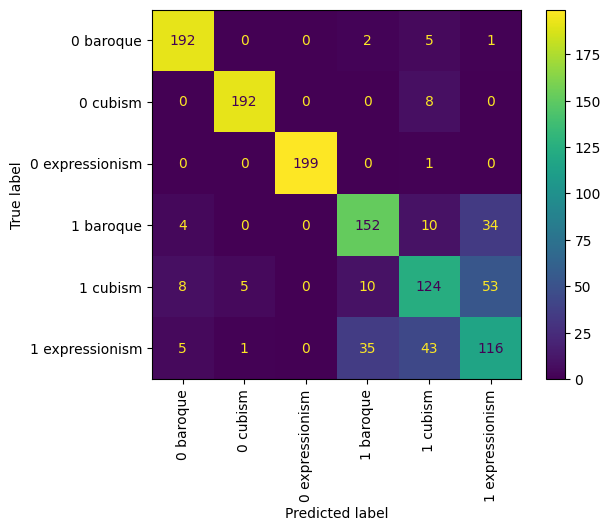

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_mlp.classes_)
disp.plot()
plt.xticks(rotation=90)
plt.show()